# NGC 6121 Analysis

In [1]:
import matplotlib.pyplot as mp
import read_dao
import sys
import coordinates
import numpy as np
from matplotlib.ticker import ScalarFormatter
from astropy.wcs import WCS
from astropy.io import fits
import optical
import lightcurves
import calibration
import analysis_routines
import variables
import glob
import re
from astropy.stats import sigma_clip
%matplotlib inline 

In [2]:
target = 'NGC6121'
folder = '/Volumes/Annie/CRRP/'+target+'/'
optical_dir = '/Volumes/Annie/CRRP/OpticalCatalogs/'
cluster_ra = '16:23:35.22'
cluster_dec = '-26:31:32.7'

## Cluster Snapshot

In [3]:
dtype1 = np.dtype([('img', 'S30'), ('ra', float), ('dec', float)])
ch1_data = np.loadtxt(folder+'I1_centers.txt', dtype=dtype1, usecols=(0,1,2))
ch2_data = np.loadtxt(folder+'I2_centers.txt', dtype=dtype1, usecols=(0,1,2))

#### Plot AOR footprint

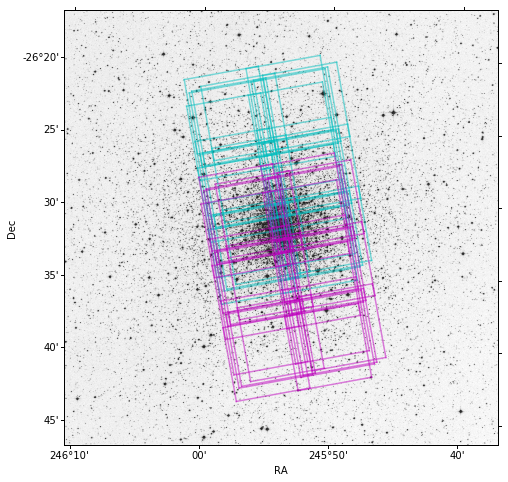

In [4]:
from matplotlib.colors import LogNorm
hdu = fits.open(folder+'dss-'+target+'.fits')[0]
wcs = WCS(hdu.header)
fig = mp.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection=wcs)
mp.imshow(hdu.data, origin='lower', cmap='gray_r')#, norm=LogNorm())

for ind, fits_file in enumerate(ch1_data['img']):
    w = WCS(folder+fits_file)
    ra1, dec1 = w.wcs_pix2world(1, 1, 0)
    ra2, dec2 = w.wcs_pix2world(1, 256, 0)
    ra3, dec3 = w.wcs_pix2world(256, 256, 0)
    ra4, dec4 = w.wcs_pix2world(256, 1, 0)
# Plot [3.6] AOR footprint
  #  mp.plot(ch1_data['ra'][ind], ch1_data['dec'][ind], 'ro')
    ax.plot([ra1, ra2], [dec1, dec2], '-', color='c', alpha=0.5, transform=ax.get_transform('fk5'))
    ax.plot([ra2, ra3], [dec2, dec3], '-', color='c', alpha=0.5, transform=ax.get_transform('fk5'))
    ax.plot([ra3, ra4], [dec3, dec4], '-', color='c', alpha=0.5, transform=ax.get_transform('fk5'))
    ax.plot([ra4, ra1], [dec4, dec1], '-', color='c', alpha=0.5, transform=ax.get_transform('fk5'))
for ind, fits_file in enumerate(ch2_data['img']):
    w = WCS(folder+fits_file)
    ra1, dec1 = w.wcs_pix2world(1, 1, 0)
    ra2, dec2 = w.wcs_pix2world(1, 256, 0)
    ra3, dec3 = w.wcs_pix2world(256, 256, 0)
    ra4, dec4 = w.wcs_pix2world(256, 1, 0)
# Plot [4.5] AOR footprint
  #  mp.plot(ch2_data['ra'][ind], ch2_data['dec'][ind], 'ro')
    ax.plot([ra1, ra2], [dec1, dec2], '-', color='m', alpha=0.5, transform=ax.get_transform('fk5'))
    ax.plot([ra2, ra3], [dec2, dec3], '-', color='m', alpha=0.5, transform=ax.get_transform('fk5'))
    ax.plot([ra3, ra4], [dec3, dec4], '-', color='m', alpha=0.5, transform=ax.get_transform('fk5'))
    ax.plot([ra4, ra1], [dec4, dec1], '-', color='m', alpha=0.5, transform=ax.get_transform('fk5'))
ax.set_xlabel('RA')
ax.set_ylabel('Dec')

x_formatter = ScalarFormatter(useOffset=False)
mp.gca().xaxis.set_major_formatter(x_formatter)
mp.show()

#### Map of source catalog with field boundaries shown

Reading optical catalog for NGC6121...
Finished reading optical catalog.


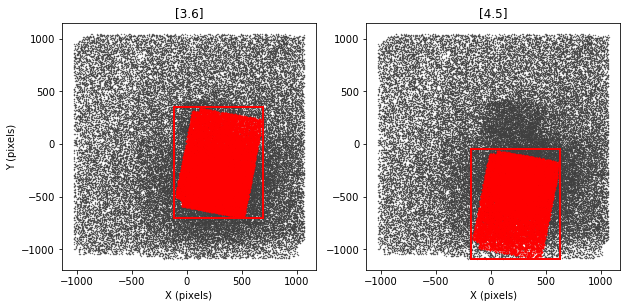

In [3]:
fig = mp.figure(figsize=(10,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

# read optical catalog and add to plots
ids, xcat, ycat, ra, dec = optical.read_optical_fnl(optical_dir, target)
ax1.plot(xcat, ycat, '.', color='0.25', markersize=0.75)
ax2.plot(xcat, ycat, '.', color='0.25', markersize=0.75)

# read boundaries of IRAC data
dtype1 = np.dtype([('xmin', float), ('xmax', float), ('ymin', float), ('ymax', float)])
I1cuts = np.loadtxt(folder+'DeepMosaic/I1-deep-cuts.txt', dtype=dtype1, usecols=(1,2,3,4))
I2cuts = np.loadtxt(folder+'DeepMosaic/I2-deep-cuts.txt', dtype=dtype1, usecols=(1,2,3,4))

ax1.plot([I1cuts['xmin'], I1cuts['xmax']], [I1cuts['ymin'], I1cuts['ymin']],
    '-', color='r', linewidth=2)
ax1.plot([I1cuts['xmin'], I1cuts['xmax']], [I1cuts['ymax'], I1cuts['ymax']],
    '-', color='r', linewidth=2)
ax1.plot([I1cuts['xmin'], I1cuts['xmin']], [I1cuts['ymin'], I1cuts['ymax']],
    '-', color='r', linewidth=2)
ax1.plot([I1cuts['xmax'], I1cuts['xmax']], [I1cuts['ymin'], I1cuts['ymax']],
    '-', color='r', linewidth=2)
ax1.set_xlabel('X (pixels)')
ax1.set_ylabel('Y (pixels)')
ax1.set_title('[3.6]')
ax2.plot([I2cuts['xmin'], I2cuts['xmax']], [I2cuts['ymin'], I2cuts['ymin']],
    '-', color='r', linewidth=2)
ax2.plot([I2cuts['xmin'], I2cuts['xmax']], [I2cuts['ymax'], I2cuts['ymax']],
    '-', color='r', linewidth=2)
ax2.plot([I2cuts['xmin'], I2cuts['xmin']], [I2cuts['ymin'], I2cuts['ymax']],
    '-', color='r', linewidth=2)
ax2.plot([I2cuts['xmax'], I2cuts['xmax']], [I2cuts['ymin'], I2cuts['ymax']],
    '-', color='r', linewidth=2)
ax2.set_xlabel('X (pixels)')
ax2.set_title('[4.5]')


# Add transformed catalogs
I1ids, I1x, I1y, I1mag, I1err = read_dao.read_alf(folder+'DeepMosaic/'+target+'_I1_deep_dn.alf')
I2ids, I2x, I2y, I2mag, I2err = read_dao.read_alf(folder+'DeepMosaic/'+target+'_I2_deep_dn.alf')

filesI1, x_offI1, y_offI1, transformI1, dofI1 = read_dao.read_mch(folder+'DeepMosaic/op-I1-deep.mch')
filesI2, x_offI2, y_offI2, transformI2, dofI2 = read_dao.read_mch(folder+'DeepMosaic/op-I2-deep.mch')

xI1 = float(x_offI1[1])+float(transformI1[1][0])*I1x+float(transformI1[1][1])*I1y
yI1 = float(y_offI1[1])+float(transformI1[1][2])*I1x+float(transformI1[1][3])*I1y
xI2 = float(x_offI2[1])+float(transformI2[1][0])*I2x+float(transformI2[1][1])*I2y
yI2 = float(y_offI2[1])+float(transformI2[1][2])*I2x+float(transformI2[1][3])*I2y

ax1.plot(xI1, yI1, '.', markersize=1.8, color='r')
ax2.plot(xI2, yI2, '.', markersize=1.8, color='r')


mp.show()

# Calibration

In [3]:
calibration.find_lst_stars(target, 'I1', data_dir=folder)
calibration.find_lst_stars(target, 'I2', data_dir=folder)

[80399] [80442 80540]
[80423] [80673]
[78171] [77959]
[69315] []
[66357] [66028 66004]
[73403] [72946 73655]
[75488] []
[73455] [73147 73250]
[71405] []
[69259] [69552 69281 69667]
[68541] [68342]
[65698] [65277]
[65090] [64787]
[65466] []
[65465] []
[67216] []
[64315] []
[47444] [48043 46942]
[62711] [62821 62266]
[62975] [62916]
[43315] []
[53950] [53422 54493]
[53879] [54338 53655]
[47521] [47459]
[49688] [50227]
[35144] [34628 34887]
[37592] [37304]
[79560] [79492]
[72521] [72764 72911 72344]
[68221] []
[76634] [76919 76756]
[70084] []
[68500] [68746]
[68277] [67824]
[66134] []
[66682] []
[66734] []
[63491] [63768 63138]
[66692] [66993 66293]
[66357] [66028 66004]
[62380] [61837]
[66482] [66526]
[72210] [72520 72129]
[59599] [59192]
[62061] [61637]
[59961] [59439 60221 59860]
[55042] [55540]
[63713] [64032 63658 63327 63488 63214 63364]
[58186] []
[53510] []
[53064] [52944]
[48219] [48587]
[53484] [54053 53772 52933]
[47444] [48043 46942]
[45569] [46134 46012 45795]
[42649] [42128]

In [9]:
calibration.do_ap_phot(target, 'I1', 30, data_dir=folder, dao_dir='/usr/local/phot/')
calibration.do_ap_phot(target, 'I2', 30, data_dir=folder, dao_dir='/usr/local/phot/')


  READ NOISE (ADU; 1 frame) =     3.95        GAIN (e-/ADU; 1 frame) =     3.70
 LOW GOOD DATUM (in sigmas) =    10.00      HIGH GOOD DATUM (in ADU) = 30000.00
             FWHM OF OBJECT =     2.00         THRESHOLD (in sigmas) =     6.00
  LS (LOW SHARPNESS CUTOFF) =     0.30    HS (HIGH SHARPNESS CUTOFF) =     1.40
  LR (LOW ROUNDNESS CUTOFF) =    -1.00    HR (HIGH ROUNDNESS CUTOFF) =     1.00
             WATCH PROGRESS =    -1.00                FITTING RADIUS =     2.00
                 PSF RADIUS =     9.00                  VARIABLE PSF =     0.00
              SKY ESTIMATOR =     0.00            ANALYTIC MODEL PSF =     2.00
  EXTRA PSF CLEANING PASSES =     5.00       USE SATURATED PSF STARS =     0.00
       PERCENT ERROR (in %) =     0.75          PROFILE ERROR (in %) =     5.00

 Command: at NGC6121:I1_46731520_01.fits
at NGC6121:I1_46731520_01.fits

     NGC6121:I1_46731520_01...               


                                      Picture size:    256   256


 Command: 

 PHO> 


 Input position file (default 
                       NGC6121:I1_46731520_08.coo): 

   Output file (default NGC6121:I1_46731520_08.ap): 


 Command: at NGC6121:I1_46731520_09.fits
at NGC6121:I1_46731520_09.fits

     NGC6121:I1_46731520_09...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6121:I1_46731520_25.coo): 

   Output file (default NGC6121:I1_46731520_25.ap): 


 Command: at NGC6121:I1_46731520_26.fits
at NGC6121:I1_46731520_26.fits

     NGC6121:I1_46731520_26...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6121:I1_46732544_12.coo): 

   Output file (default NGC6121:I1_46732544_12.ap): 


 Command: at NGC6121:I1_46732544_13.fits
at NGC6121:I1_46732544_13.fits

     NGC6121:I1_46732544_13...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6121:I1_46732544_29.coo): 

   Output file (default NGC6121:I1_46732544_29.ap): 


 Command: at NGC6121:I1_46732544_30.fits
at NGC6121:I1_46732544_30.fits

     NGC6121:I1_46732544_30...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6121:I1_46733568_16.coo): 

   Output file (default NGC6121:I1_46733568_16.ap): 


 Command: at NGC6121:I1_46733568_17.fits
at NGC6121:I1_46733568_17.fits

     NGC6121:I1_46733568_17...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6121:I1_46772736_03.coo): 

   Output file (default NGC6121:I1_46772736_03.ap): 


 Command: at NGC6121:I1_46772736_04.fits
at NGC6121:I1_46772736_04.fits

     NGC6121:I1_46772736_04...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6121:I1_46772736_20.coo): 

   Output file (default NGC6121:I1_46772736_20.ap): 


 Command: at NGC6121:I1_46772736_21.fits
at NGC6121:I1_46772736_21.fits

     NGC6121:I1_46772736_21...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6121:I1_46772992_07.coo): 

   Output file (default NGC6121:I1_46772992_07.ap): 


 Command: at NGC6121:I1_46772992_08.fits
at NGC6121:I1_46772992_08.fits

     NGC6121:I1_46772992_08...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6121:I1_46772992_24.coo): 

   Output file (default NGC6121:I1_46772992_24.ap): 


 Command: at NGC6121:I1_46772992_25.fits
at NGC6121:I1_46772992_25.fits

     NGC6121:I1_46772992_25...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6121:I1_46773248_11.coo): 

   Output file (default NGC6121:I1_46773248_11.ap): 


 Command: at NGC6121:I1_46773248_12.fits
at NGC6121:I1_46773248_12.fits

     NGC6121:I1_46773248_12...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6121:I1_46773248_28.coo): 

   Output file (default NGC6121:I1_46773248_28.ap): 


 Command: at NGC6121:I1_46773248_29.fits
at NGC6121:I1_46773248_29.fits

     NGC6121:I1_46773248_29...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6121:I1_46773504_15.coo): 

   Output file (default NGC6121:I1_46773504_15.ap): 


 Command: at NGC6121:I1_46773504_16.fits
at NGC6121:I1_46773504_16.fits

     NGC6121:I1_46773504_16...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6121:I1_46773760_02.coo): 

   Output file (default NGC6121:I1_46773760_02.ap): 


 Command: at NGC6121:I1_46773760_03.fits
at NGC6121:I1_46773760_03.fits

     NGC6121:I1_46773760_03...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6121:I1_46773760_19.coo): 

   Output file (default NGC6121:I1_46773760_19.ap): 


 Command: at NGC6121:I1_46773760_20.fits
at NGC6121:I1_46773760_20.fits

     NGC6121:I1_46773760_20...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6121:I1_46774272_06.coo): 

   Output file (default NGC6121:I1_46774272_06.ap): 


 Command: at NGC6121:I1_46774272_07.fits
at NGC6121:I1_46774272_07.fits

     NGC6121:I1_46774272_07...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6121:I1_46774272_23.coo): 

   Output file (default NGC6121:I1_46774272_23.ap): 


 Command: at NGC6121:I1_46774272_24.fits
at NGC6121:I1_46774272_24.fits

     NGC6121:I1_46774272_24...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6121:I1_46774784_10.coo): 

   Output file (default NGC6121:I1_46774784_10.ap): 


 Command: at NGC6121:I1_46774784_11.fits
at NGC6121:I1_46774784_11.fits

     NGC6121:I1_46774784_11...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6121:I1_46774784_27.coo): 

   Output file (default NGC6121:I1_46774784_27.ap): 


 Command: at NGC6121:I1_46774784_28.fits
at NGC6121:I1_46774784_28.fits

     NGC6121:I1_46774784_28...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6121:I1_46775296_14.coo): 

   Output file (default NGC6121:I1_46775296_14.ap): 


 Command: at NGC6121:I1_46775296_15.fits
at NGC6121:I1_46775296_15.fits

     NGC6121:I1_46775296_15...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6121:I1_46775808_01.coo): 

   Output file (default NGC6121:I1_46775808_01.ap): 


 Command: at NGC6121:I1_46775808_02.fits
at NGC6121:I1_46775808_02.fits

     NGC6121:I1_46775808_02...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6121:I1_46775808_18.coo): 

   Output file (default NGC6121:I1_46775808_18.ap): 


 Command: at NGC6121:I1_46775808_19.fits
at NGC6121:I1_46775808_19.fits

     NGC6121:I1_46775808_19...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

                       NGC6121:I2_46731520_02.coo): 

   Output file (default NGC6121:I2_46731520_02.ap): 


 Command: at NGC6121:I2_46731520_03.fits
at NGC6121:I2_46731520_03.fits

     NGC6121:I2_46731520_03...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position file (default 
                       NGC

 PHO> 


 Input position file (default 
                       NGC6121:I2_46731520_11.coo): 

   Output file (default NGC6121:I2_46731520_11.ap): 


 Command: at NGC6121:I2_46731520_12.fits
at NGC6121:I2_46731520_12.fits

     NGC6121:I2_46731520_12...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6121:I2_46731520_28.coo): 

   Output file (default NGC6121:I2_46731520_28.ap): 


 Command: at NGC6121:I2_46731520_29.fits
at NGC6121:I2_46731520_29.fits

     NGC6121:I2_46731520_29...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6121:I2_46732544_15.coo): 

   Output file (default NGC6121:I2_46732544_15.ap): 


 Command: at NGC6121:I2_46732544_16.fits
at NGC6121:I2_46732544_16.fits

     NGC6121:I2_46732544_16...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6121:I2_46733568_02.coo): 

   Output file (default NGC6121:I2_46733568_02.ap): 


 Command: at NGC6121:I2_46733568_03.fits
at NGC6121:I2_46733568_03.fits

     NGC6121:I2_46733568_03...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6121:I2_46733568_19.coo): 

   Output file (default NGC6121:I2_46733568_19.ap): 


 Command: at NGC6121:I2_46733568_20.fits
at NGC6121:I2_46733568_20.fits

     NGC6121:I2_46733568_20...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6121:I2_46772736_06.coo): 

   Output file (default NGC6121:I2_46772736_06.ap): 


 Command: at NGC6121:I2_46772736_07.fits
at NGC6121:I2_46772736_07.fits

     NGC6121:I2_46772736_07...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6121:I2_46772736_23.coo): 

   Output file (default NGC6121:I2_46772736_23.ap): 


 Command: at NGC6121:I2_46772736_24.fits
at NGC6121:I2_46772736_24.fits

     NGC6121:I2_46772736_24...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6121:I2_46772992_10.coo): 

   Output file (default NGC6121:I2_46772992_10.ap): 


 Command: at NGC6121:I2_46772992_11.fits
at NGC6121:I2_46772992_11.fits

     NGC6121:I2_46772992_11...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6121:I2_46772992_27.coo): 

   Output file (default NGC6121:I2_46772992_27.ap): 


 Command: at NGC6121:I2_46772992_28.fits
at NGC6121:I2_46772992_28.fits

     NGC6121:I2_46772992_28...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6121:I2_46773248_14.coo): 

   Output file (default NGC6121:I2_46773248_14.ap): 


 Command: at NGC6121:I2_46773248_15.fits
at NGC6121:I2_46773248_15.fits

     NGC6121:I2_46773248_15...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6121:I2_46773504_01.coo): 

   Output file (default NGC6121:I2_46773504_01.ap): 


 Command: at NGC6121:I2_46773504_02.fits
at NGC6121:I2_46773504_02.fits

     NGC6121:I2_46773504_02...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6121:I2_46773504_18.coo): 

   Output file (default NGC6121:I2_46773504_18.ap): 


 Command: at NGC6121:I2_46773504_19.fits
at NGC6121:I2_46773504_19.fits

     NGC6121:I2_46773504_19...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6121:I2_46773760_05.coo): 

   Output file (default NGC6121:I2_46773760_05.ap): 


 Command: at NGC6121:I2_46773760_06.fits
at NGC6121:I2_46773760_06.fits

     NGC6121:I2_46773760_06...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6121:I2_46773760_22.coo): 

   Output file (default NGC6121:I2_46773760_22.ap): 


 Command: at NGC6121:I2_46773760_23.fits
at NGC6121:I2_46773760_23.fits

     NGC6121:I2_46773760_23...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6121:I2_46774272_09.coo): 

   Output file (default NGC6121:I2_46774272_09.ap): 


 Command: at NGC6121:I2_46774272_10.fits
at NGC6121:I2_46774272_10.fits

     NGC6121:I2_46774272_10...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6121:I2_46774272_26.coo): 

   Output file (default NGC6121:I2_46774272_26.ap): 


 Command: at NGC6121:I2_46774272_27.fits
at NGC6121:I2_46774272_27.fits

     NGC6121:I2_46774272_27...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6121:I2_46774784_13.coo): 

   Output file (default NGC6121:I2_46774784_13.ap): 


 Command: at NGC6121:I2_46774784_14.fits
at NGC6121:I2_46774784_14.fits

     NGC6121:I2_46774784_14...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6121:I2_46774784_30.coo): 

   Output file (default NGC6121:I2_46774784_30.ap): 


 Command: at NGC6121:I2_46775296_01.fits
at NGC6121:I2_46775296_01.fits

     NGC6121:I2_46775296_01...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6121:I2_46775296_17.coo): 

   Output file (default NGC6121:I2_46775296_17.ap): 


 Command: at NGC6121:I2_46775296_18.fits
at NGC6121:I2_46775296_18.fits

     NGC6121:I2_46775296_18...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6121:I2_46775808_04.coo): 

   Output file (default NGC6121:I2_46775808_04.ap): 


 Command: at NGC6121:I2_46775808_05.fits
at NGC6121:I2_46775808_05.fits

     NGC6121:I2_46775808_05...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

 PHO> 


 Input position file (default 
                       NGC6121:I2_46775808_21.coo): 

   Output file (default NGC6121:I2_46775808_21.ap): 


 Command: at NGC6121:I2_46775808_22.fits
at NGC6121:I2_46775808_22.fits

     NGC6121:I2_46775808_22...               


                                      Picture size:    256   256


 Command: phot
phot

      File with aperture radii (default photo.opt): 


  A1  RADIUS OF APERTURE  1 =     3.00     A2  RADIUS OF APERTURE  2 =     0.00
  A3  RADIUS OF APERTURE  3 =     0.00     A4  RADIUS OF APERTURE  4 =     0.00
  A5  RADIUS OF APERTURE  5 =     0.00     A6  RADIUS OF APERTURE  6 =     0.00
  A7  RADIUS OF APERTURE  7 =     0.00     A8  RADIUS OF APERTURE  8 =     0.00
  A9  RADIUS OF APERTURE  9 =     0.00     AA  RADIUS OF APERTURE 10 =     0.00
  AB  RADIUS OF APERTURE 11 =     0.00     AC  RADIUS OF APERTURE 12 =     0.00
  IS       INNER SKY RADIUS =     3.00     OS       OUTER SKY RADIUS =     7.00

 PHO> 


 Input position f

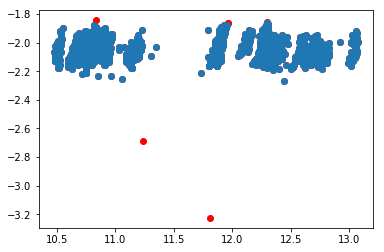

-2.06924311377 0.083133732879
-2.05633512867 0.0683944027791
There are 26 psf stars.


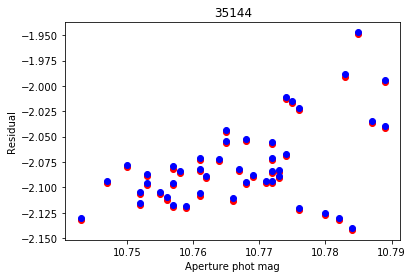

0.046 0.192
0.0115314356245 0.036046919907


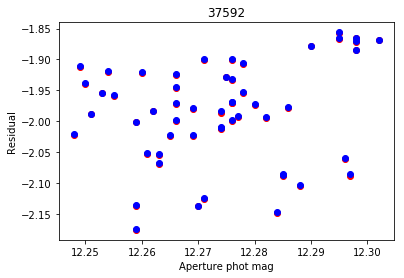

0.054 0.282
0.0143718852554 0.0791172775683


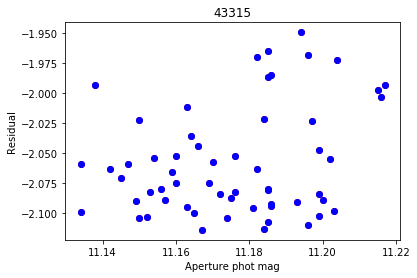

0.083 0.175
0.021156064675 0.0439406961714


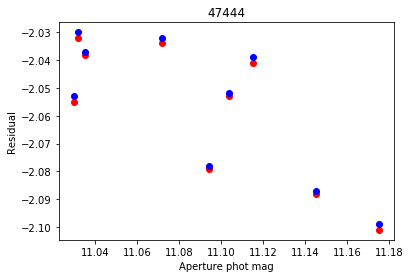

0.145 0.212
0.0487543603621 0.0690267437884


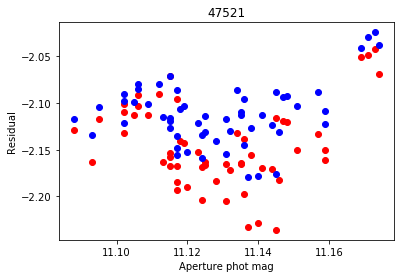

0.086 0.135
0.0206276232992 0.0337028826292


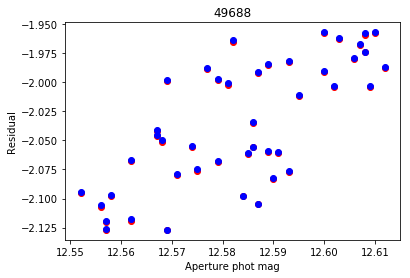

0.06 0.15
0.016884329377 0.0426547438091


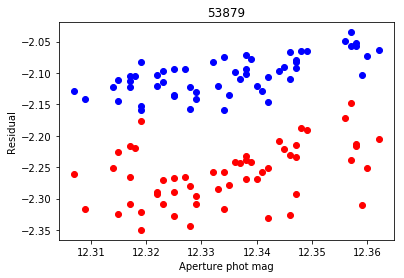

0.055 0.101
0.0144664350255 0.0235148061802


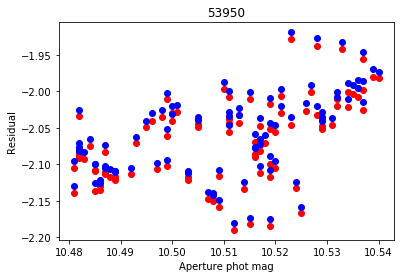

0.059 0.252
0.0174481868507 0.0502437162731


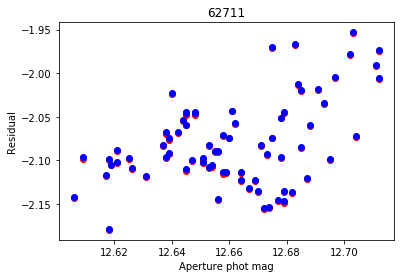

0.106 0.183
0.0259405822159 0.044081671413


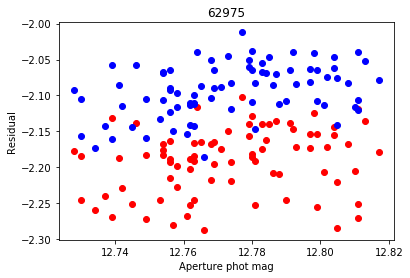

0.089 0.162
0.0229132057993 0.0347809911266


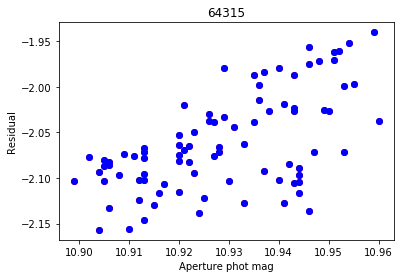

0.061 0.183
0.0160365995675 0.0454075767462


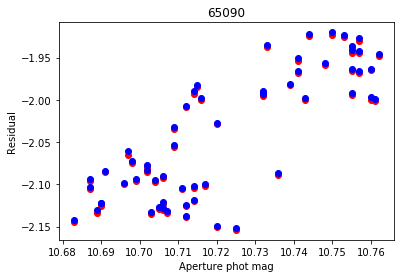

0.079 0.211
0.0239354065369 0.0572071070022


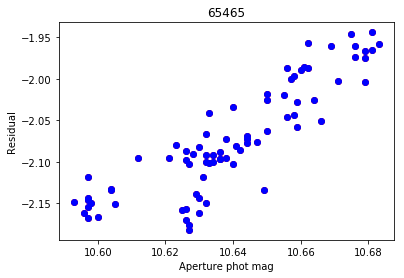

0.09 0.19
0.0241129572217 0.0469026852228


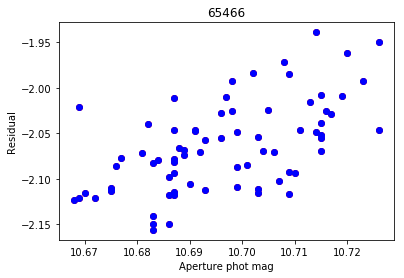

0.058 0.186
0.0150952478748 0.0417579900107


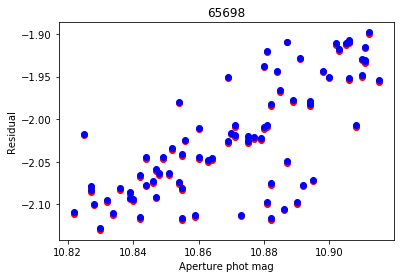

0.093 0.202
0.0260404013026 0.0512509618812


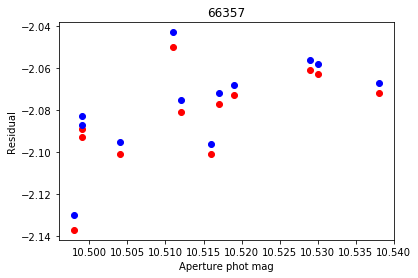

0.04 0.074
0.0126249312429 0.0173629554576


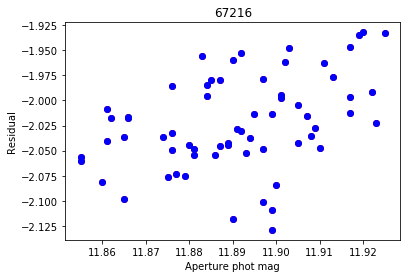

0.07 0.189
0.0181654653356 0.0423374620562


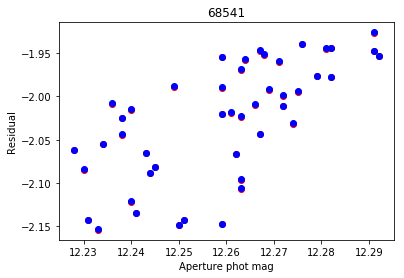

0.064 0.193
0.0174803832802 0.0563249920186


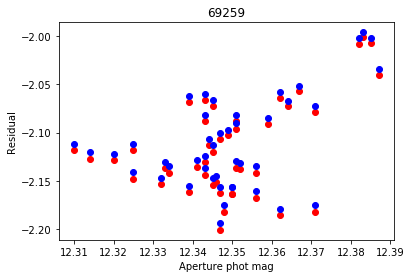

0.077 0.167
0.0172369695664 0.0423225695899


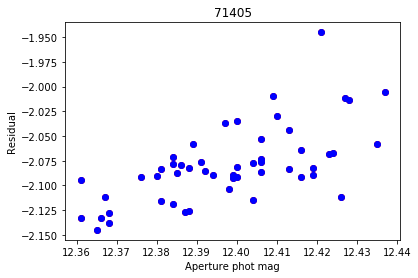

0.076 0.172
0.0197257359752 0.0295137867694


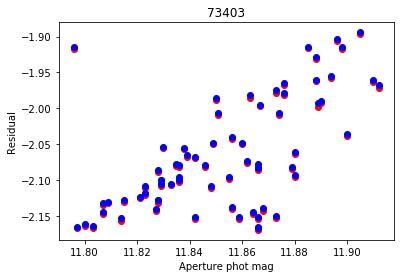

0.116 0.321
0.0295498681384 0.0628246510375


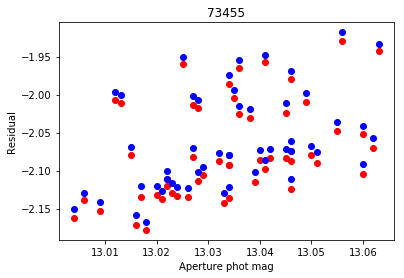

0.059 0.211
0.0148194633534 0.0576045999971


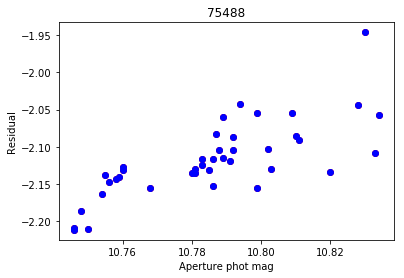

0.088 0.185
0.0246370528879 0.0357140641065


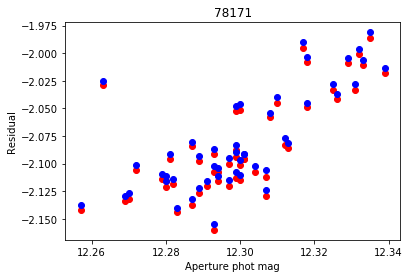

0.082 0.16
0.0192174504032 0.0330709298327


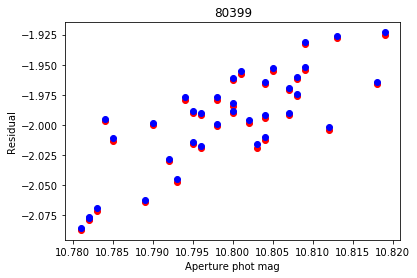

0.038 0.127
0.00997396171763 0.033621730251


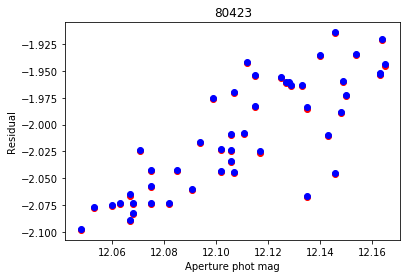

0.117 0.147
0.0330043925949 0.0316473625371


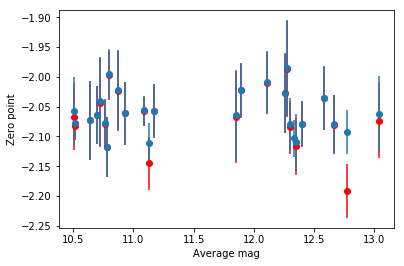

-2.06590281173 0.0444560813452
-2.06009484802 0.0343507116087


In [10]:
I1zp, I1zper = calibration.find_zp_bcds('I1', data_dir=folder)

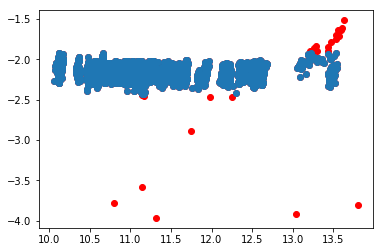

-2.17547866483 0.0883443241343
-2.17083579088 0.0882220828591
There are 51 psf stars.


calibration.py:338: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 613439 but corresponding boolean dimension is 3013


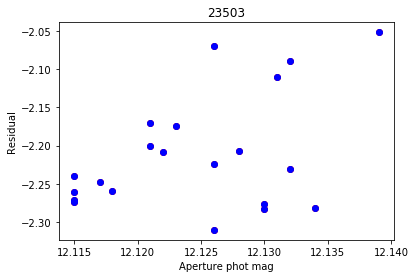

0.024 0.245
0.00699368033483 0.070540414752


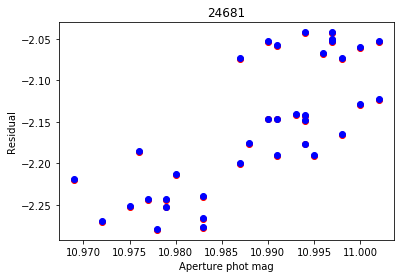

0.033 0.224
0.00892181402138 0.0716814368931


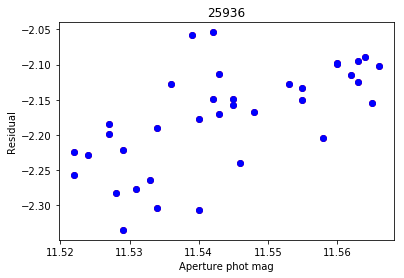

0.044 0.268
0.0136357769702 0.0643223160303


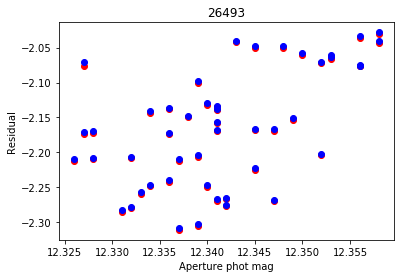

0.032 0.262
0.00875158913332 0.0780397630537


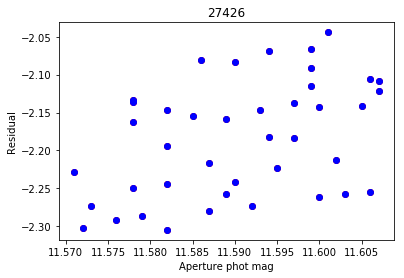

0.036 0.242
0.0105162405209 0.0705932370415


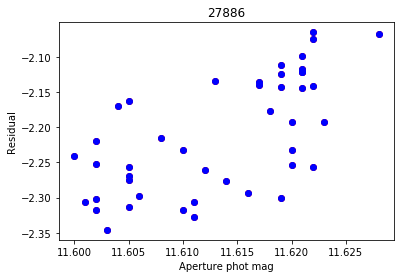

0.028 0.262
0.00786639468176 0.0761657711185


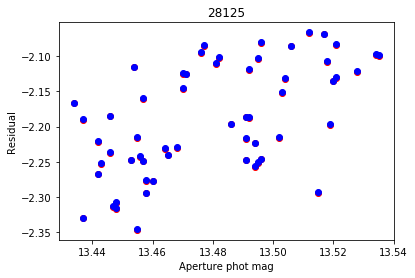

0.101 0.247
0.0282248119904 0.0651035943891


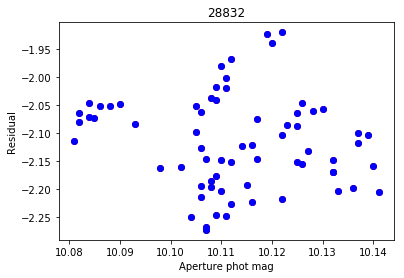

0.06 0.338
0.0153616931895 0.0859614110334


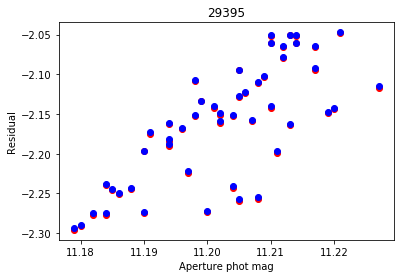

0.048 0.212
0.0117396085538 0.0653141257851


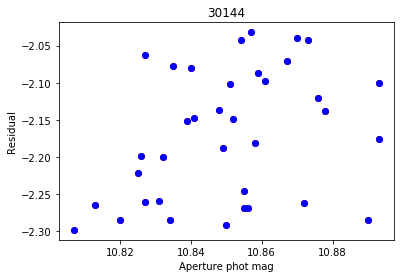

0.086 0.286
0.0215551975915 0.0816738611721


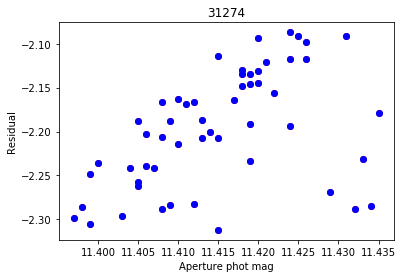

0.038 0.216
0.00973632134642 0.0614552738654


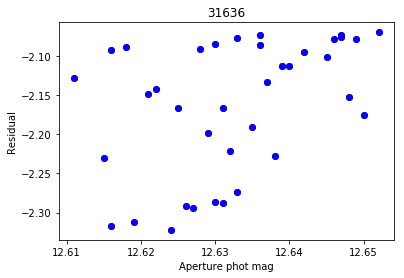

0.041 0.239
0.0109386361979 0.0797076469648


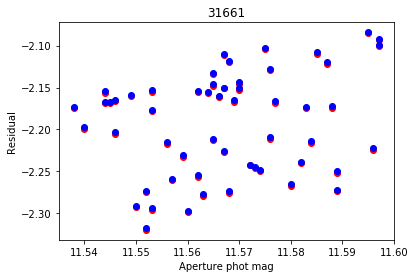

0.059 0.193
0.0155285479833 0.0589861327313


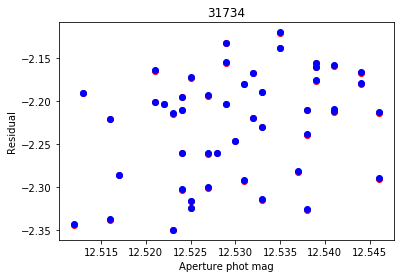

0.034 0.218
0.00864578313238 0.0594820818025


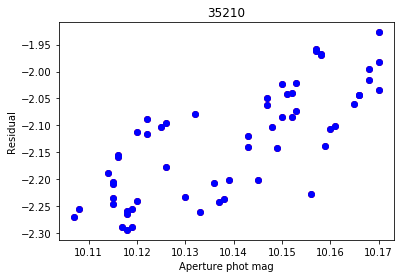

0.063 0.315
0.0192030382782 0.086578321784


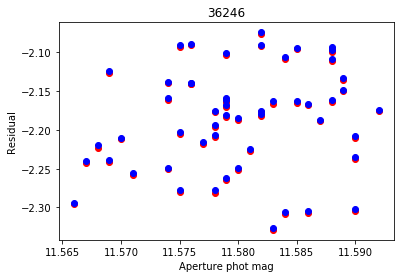

0.026 0.253
0.00657887489421 0.06450711337


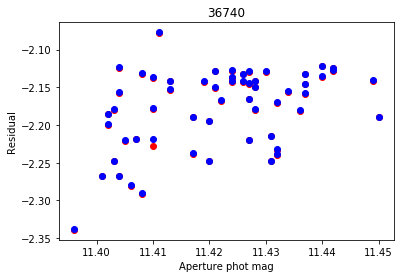

0.054 0.246
0.0134400851175 0.0482543532755


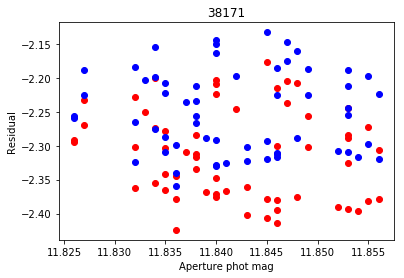

0.03 0.218
0.00809719043631 0.0613987864201


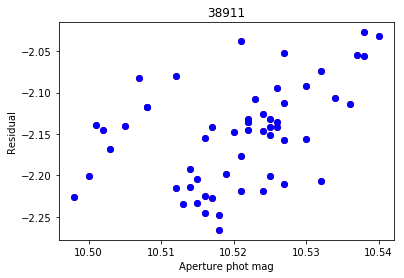

0.042 0.226
0.00996636386759 0.0562004776703


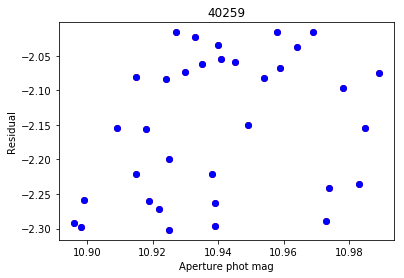

0.093 0.319
0.0255892663754 0.0955903393434


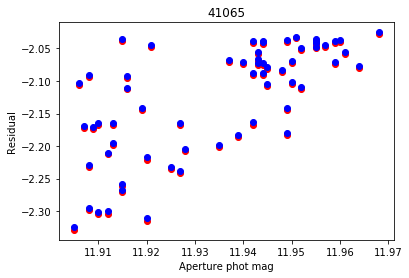

0.063 0.28
0.0184816259966 0.0736257798808


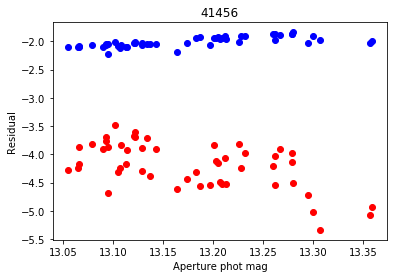

0.304 0.285
0.0805972419947 0.0652705898846


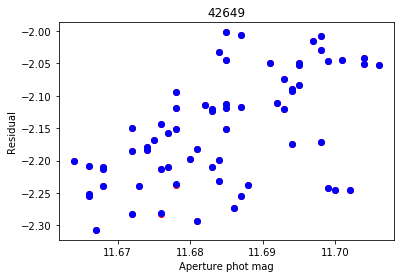

0.042 0.287
0.0110650053518 0.0777876205565


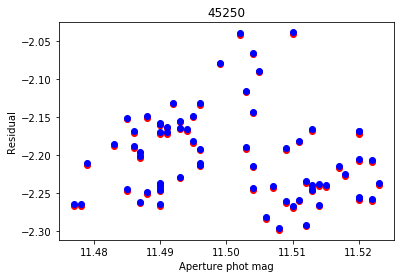

0.046 0.263
0.0125863036217 0.0610843965974


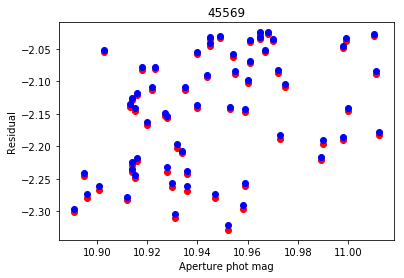

0.121 0.32
0.0309172176891 0.0816317140122


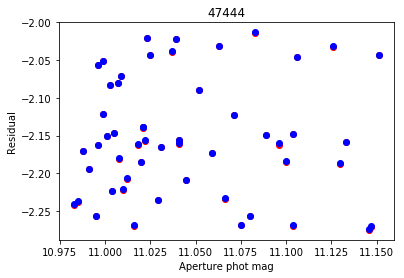

0.168 0.376
0.0477329777643 0.0912011340358


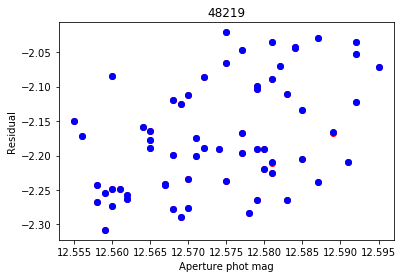

0.04 0.271
0.0103217573469 0.0756948396045


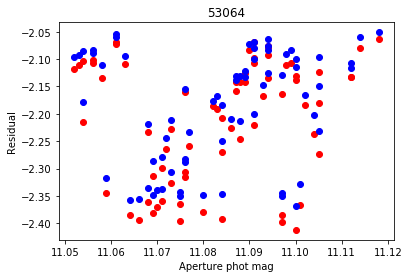

0.066 0.353
0.0167321272298 0.100692848782


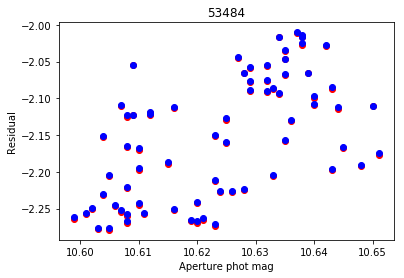

0.052 0.247
0.0141467778363 0.0752721334136


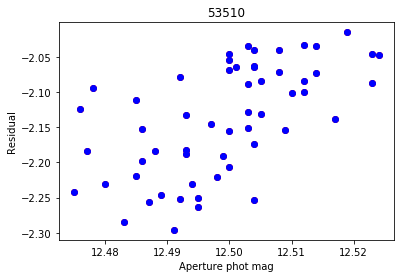

0.049 0.253
0.0120880986967 0.0713472304713


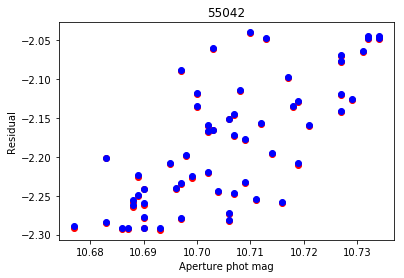

0.057 0.237
0.0147170966249 0.0698351857904


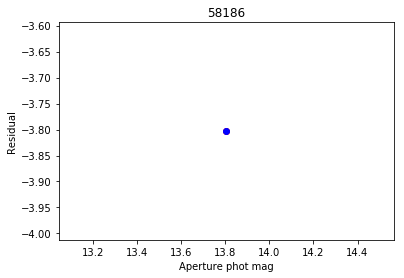

0.0 0.0
0.0 0.0


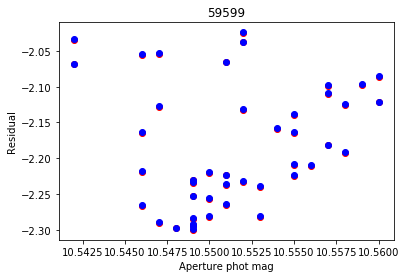

0.018 0.272
0.00447952181627 0.0835248855627


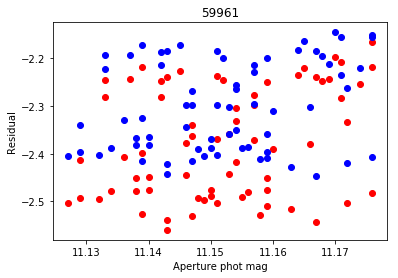

0.049 0.304
0.0130402209181 0.0913579917452


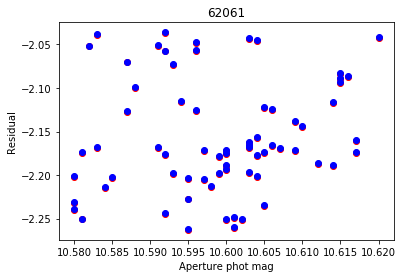

0.04 0.24
0.0103732080214 0.063641950289


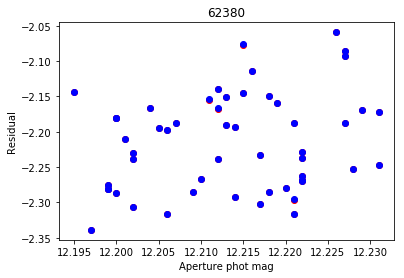

0.036 0.252
0.00995440790235 0.0668157710673


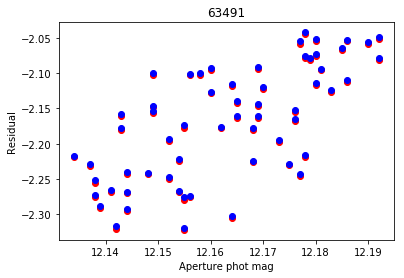

0.058 0.254
0.0160040272709 0.0697227525434


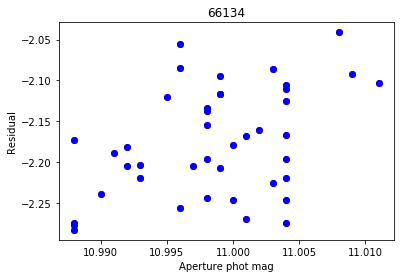

0.023 0.23
0.00581132875942 0.0631301834943


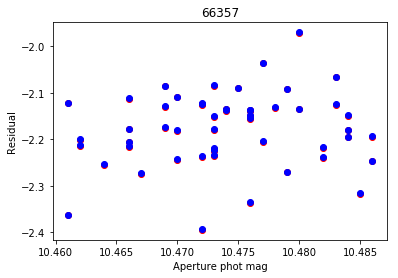

0.025 0.415
0.00679088427149 0.078907861433


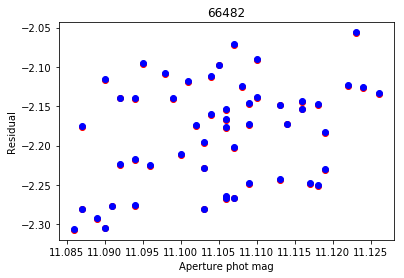

0.04 0.216
0.0104664103597 0.0623939413404


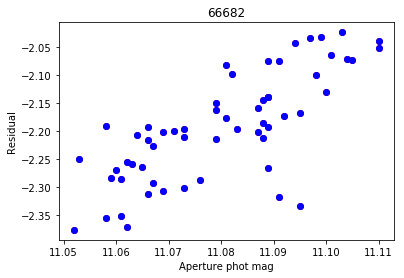

0.058 0.307
0.0155160535944 0.0842068541896


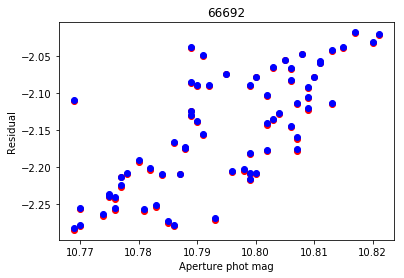

0.052 0.237
0.0136709033577 0.0676459510779


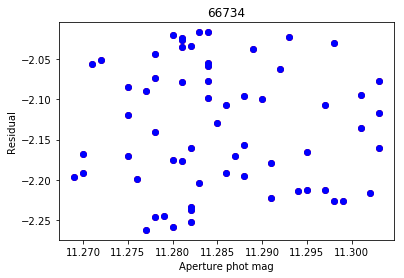

0.034 0.239
0.00904210358203 0.076059265325


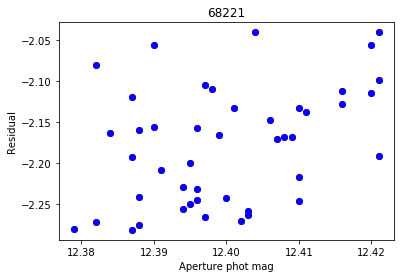

0.042 0.229
0.0116265766221 0.0669007224674


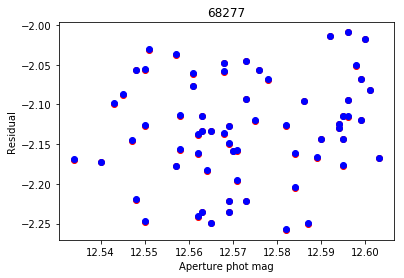

0.069 0.258
0.0177881284792 0.0644957060173


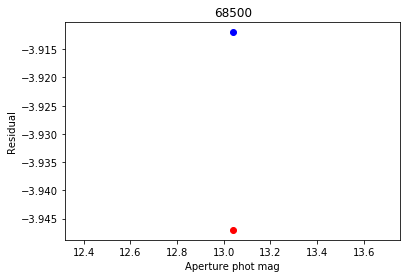

0.0 0.0
0.0 0.0


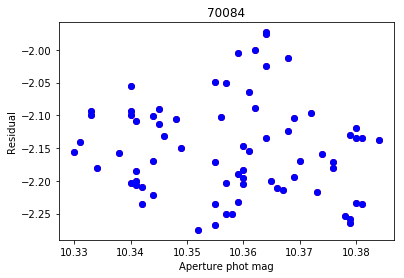

0.054 0.307
0.0145570132858 0.0757404078085


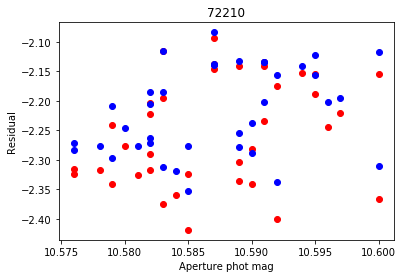

0.024 0.267
0.00641947366024 0.0712318101805


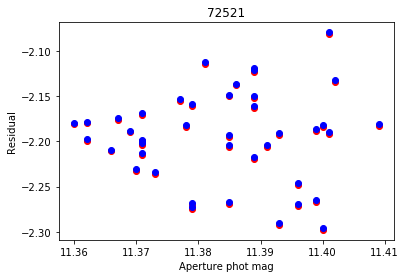

0.049 0.216
0.012747059596 0.0510491071212


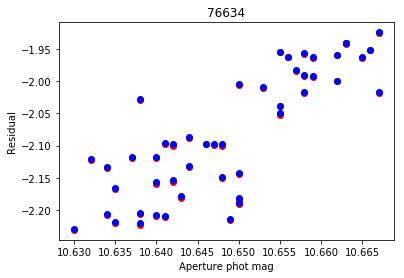

0.037 0.272
0.0103829454181 0.0871463662427


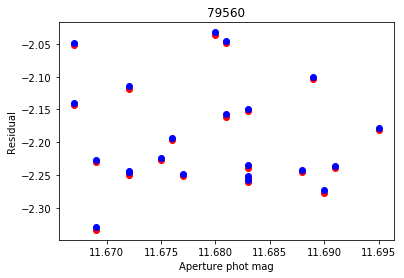

0.028 0.287
0.00808439472172 0.0803033633498


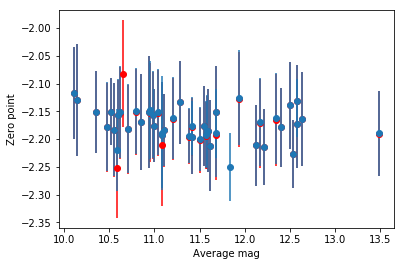

-2.17172906704 0.0307166154281
-2.17333602105 0.0280139759456


In [11]:
I2zp, I2zper = calibration.find_zp_bcds('I2', data_dir=folder)

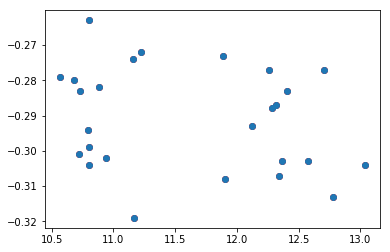

-0.289086956522 0.0131675260741
-0.291076923077 0.0143926345397
There are 27 psf stars.


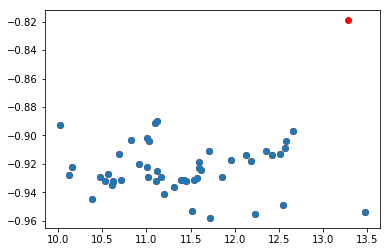

-0.92447826087 0.0163849601377
-0.923897959184 0.0162709769133
There are 52 psf stars.


In [12]:
I1_mosaic_zp, I1_mosaic_zper = calibration.find_zp_deep_mosaic(target, 'I1', data_dir=folder)
I2_mosaic_zp, I2_mosaic_zper = calibration.find_zp_deep_mosaic(target, 'I2', data_dir=folder)

In [13]:
calibration.apply_calibration_bcds(target, 'I1', -2.072, data_dir=folder)
calibration.apply_calibration_bcds(target, 'I2', -2.182, data_dir=folder)


NameError: global name 'alf' is not defined

In [3]:
calibration.apply_calibration_deep_mosaic(target, 'I1', -0.29, data_dir=folder)
calibration.apply_calibration_deep_mosaic(target, 'I2', -0.92, data_dir=folder)

## MIR catalog

In [4]:
center_ra, center_dec = coordinates.radec_string2deg(cluster_ra, cluster_dec)
analysis_routines.merge_opt_deep_catalogs(target, optical_dir, folder, cluster_coord=[center_ra, center_dec])

Reading optical catalog for NGC6121...
Finished reading optical catalog.
Reading MIR catalog for NGC6121...


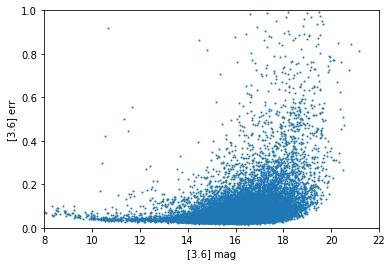

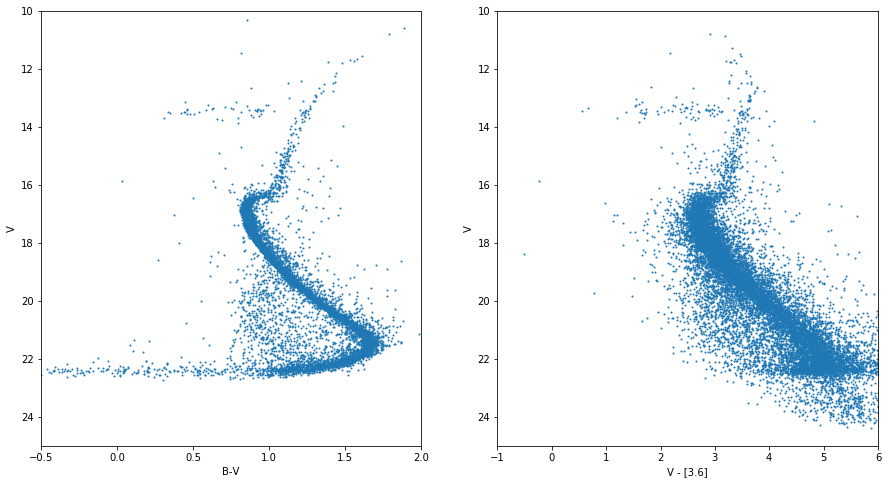

In [8]:
#center_ra, center_dec = coordinates.radec_string2deg(cluster_ra, cluster_dec)
# change to read merged catalog
catalog_data = analysis_routines.read_merged_catalog(folder)

thres = 300
thres2 = 150
dist = catalog_data['rad_dist']
colorBV = catalog_data['B'][(dist > thres2) & (dist < thres)] - catalog_data['V'][(dist > thres2) & (dist < thres)]
Vmag = catalog_data['V'][(dist > thres2) & (dist < thres)]
colorVIR = catalog_data['V'][dist > thres2] - catalog_data['3.6'][dist > thres2]
mag = catalog_data['V'][dist > thres2]
magIR = catalog_data['3.6'][dist > thres2]
err = catalog_data['3.6er'][dist > thres2]

fig = mp.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(magIR, err, s=1, edgecolor=None)
ax1.set_ylim((0,1.0))
ax1.set_xlim((8,22))
ax1.set_xlabel('[3.6] mag')
ax1.set_ylabel('[3.6] err')

good_mag = mag[err < 0.2]
good_color = colorVIR[err < 0.2]

fig2 = mp.figure(figsize=(15,8))
ax2 = fig2.add_subplot(121)
ax2.scatter(colorBV, Vmag, s=1, edgecolor=None)
ax2.set_ylim((25,10))
ax2.set_xlim((-0.5,2))
ax2.set_xlabel('B-V')
ax2.set_ylabel('V')
ax3 = fig2.add_subplot(122)
ax3.scatter(good_color, good_mag, s=1, edgecolor=None)
ax3.set_ylim((25,10))
ax3.set_xlim((-1,6))
ax3.set_xlabel('V - [3.6]')
ax3.set_ylabel('V')
mp.savefig(folder+target+'cmd.eps', format='eps')

# Variable stars

In [ ]:
# Find all stars identified as possible variables in optical catalog and list them in PeterIDs.txt

center_ra, center_dec = coordinates.radec_string2deg(cluster_ra, cluster_dec)
optical.find_variables_fnl(optical_dir, target, center_ra, center_dec, data_dir=folder)

## First check on RRL PL relation

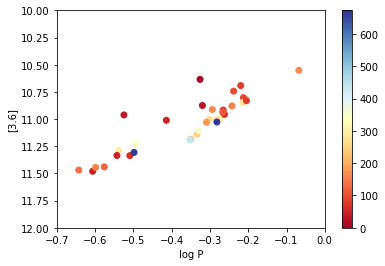

In [7]:
dtype1 = np.dtype([('id', 'S4'), ('cc_period', float), ('new_period', float)])
data = np.loadtxt(folder+target+'-variables.txt', dtype=dtype1, usecols=(0,1,2))

dtype1 = np.dtype([('star', 'S10'), ('dao', int)])
dao_ids = np.loadtxt(folder+'PeterIDs.txt', dtype=dtype1, usecols=(0,1))

catalog_data = analysis_routines.read_merged_catalog(folder)

mag = np.zeros(len(data['id']))
dist = np.zeros(len(data['id']))

for ind, star in enumerate(data['id']):
    dao_id = dao_ids['dao'][dao_ids['star'] == star]
    if len(dao_id) == 0: continue
    m = catalog_data['3.6'][catalog_data['id'] == dao_id]  
    d = catalog_data['rad_dist'][catalog_data['id'] == dao_id]
    if m < 50: 
        mag[ind] = m
        dist[ind] = d
    if m > 50: 
        mag[ind] = np.nan
        dist[ind] = np.nan
cm = mp.cm.get_cmap('RdYlBu')    
mp.scatter(np.log10(data['new_period']), mag, c=dist, cmap=cm) 
mp.colorbar()
mp.ylim((12, 10))
mp.xlim((-0.7, 0))
mp.xlabel('log P')
mp.ylabel('[3.6]')
mp.savefig(target+'pl.eps', format='eps')

##  Generate MIR light curves matching optical ID numbers  

In [9]:
dtype1 = np.dtype([('star', 'S10'), ('dao', int)])
data = np.loadtxt(folder+'PeterIDs.txt', dtype=dtype1, usecols=(0,1))

lightcurves.make_lcv(['I1', 'I2'], data['star'], data['dao'], data_dir=folder)

#### Phase MIR light curves

In [10]:
dtype1 = np.dtype([('id', 'S4'), ('cc_period', float), ('new_period', float)])
data = np.loadtxt(folder+target+'-variables.txt', dtype=dtype1, usecols=(0,1,2))

for ind, lcv in enumerate(data['id']):
    lcv_file = folder+'lcvs/mir/'+lcv+'.lcv'
    try:
        lightcurves.phase_lcv(lcv_file, data['new_period'][ind], 0, bin=1)
    except:
        print lcv +' not found.'

V30 not found.
V31 not found.
V32 not found.
V33 not found.
V34 not found.
V35 not found.
V43 not found.
V64 not found.
V75 not found.
V76 not found.


#### Create figure with all bands phased together

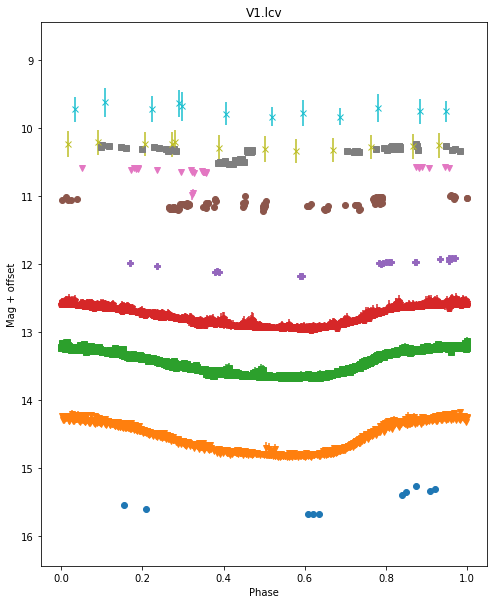

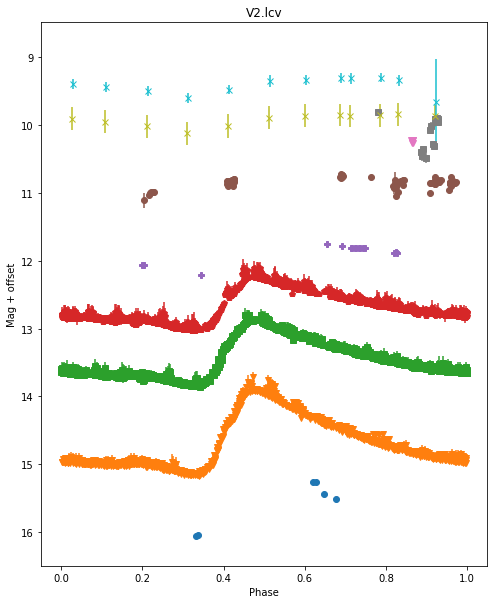

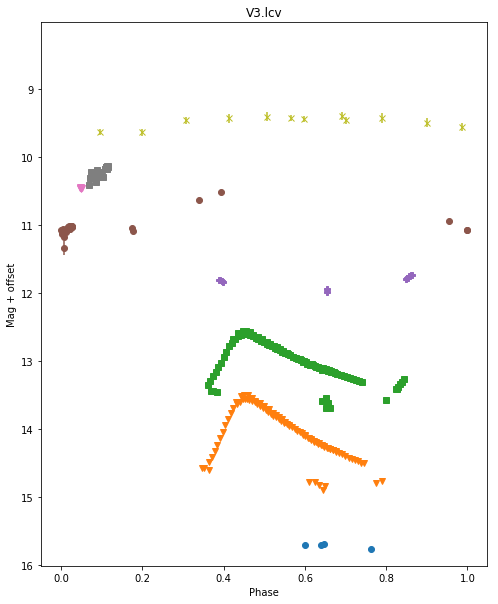

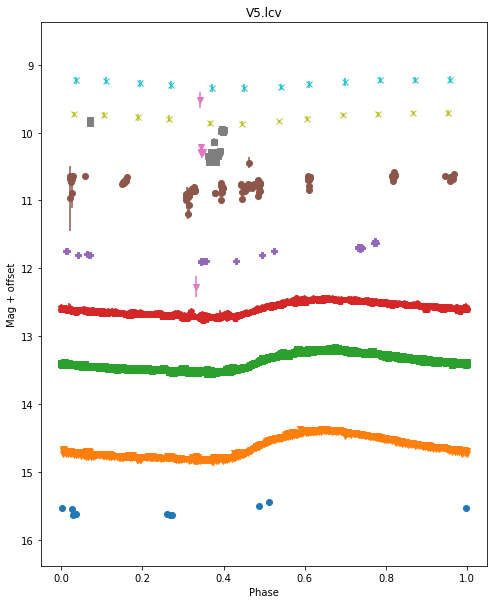

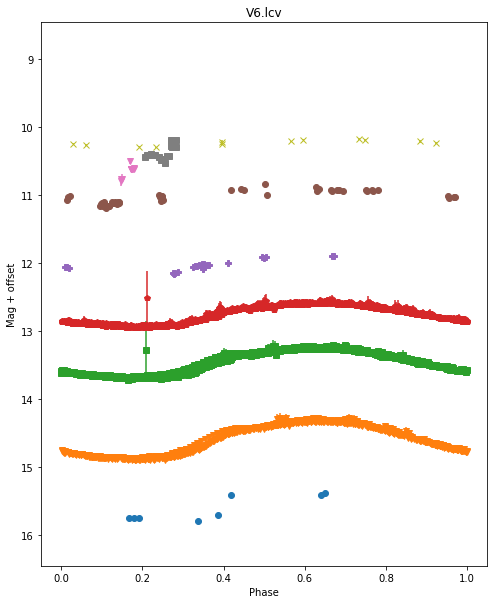

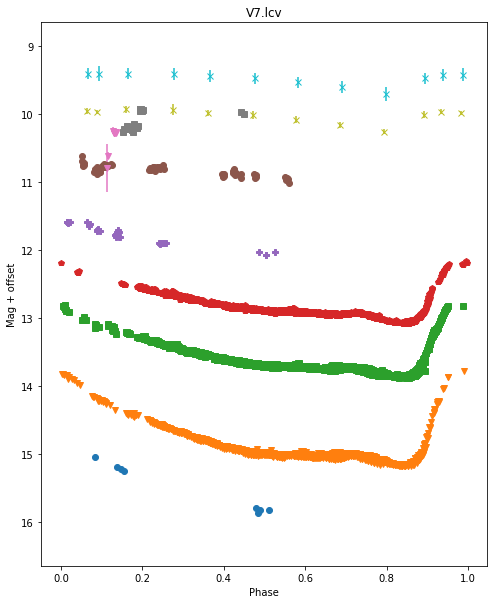

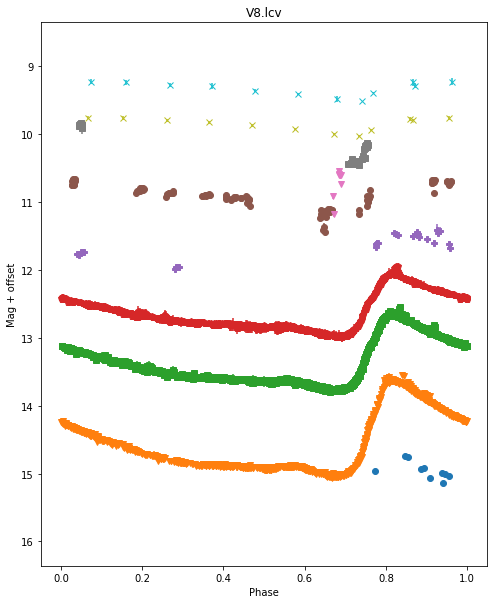

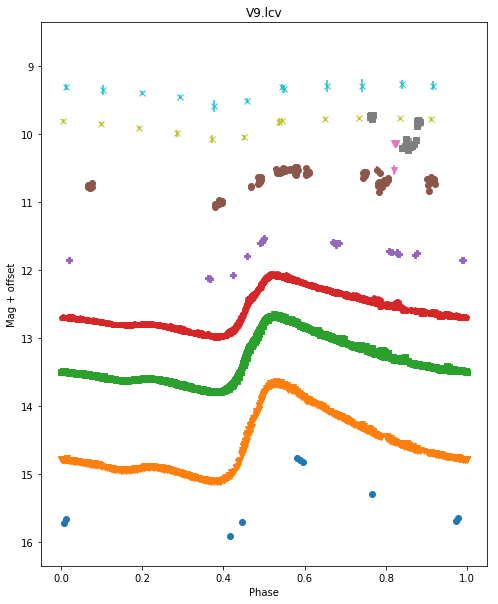

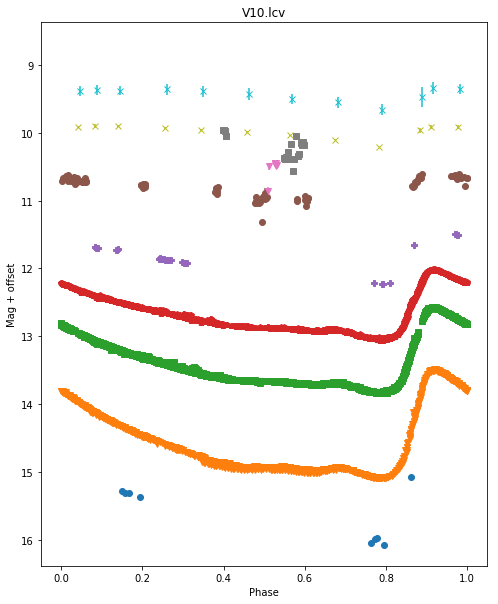

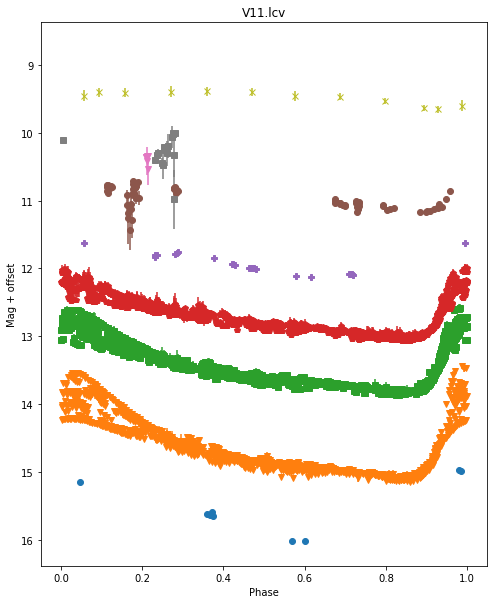

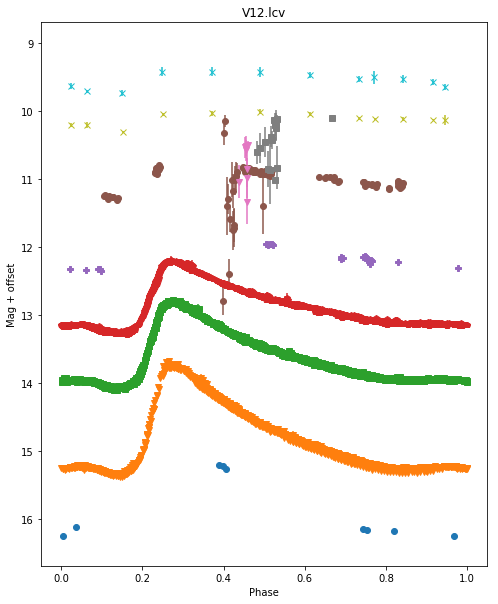

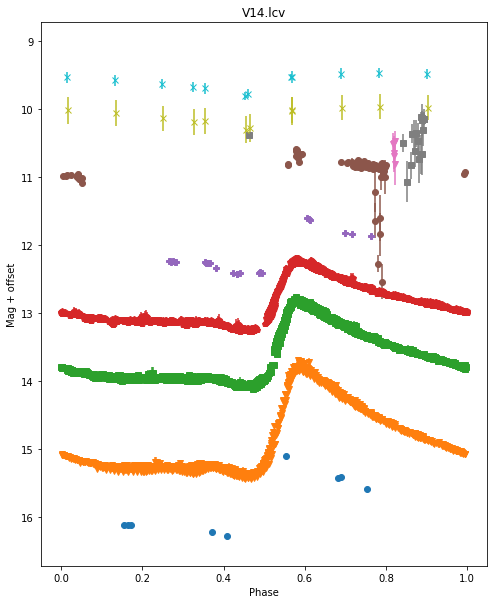

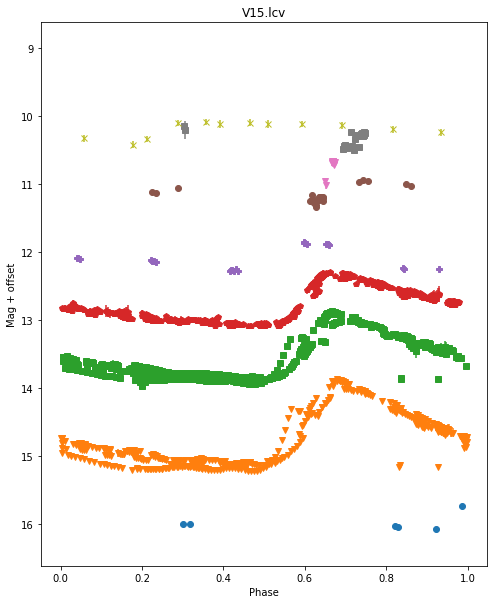

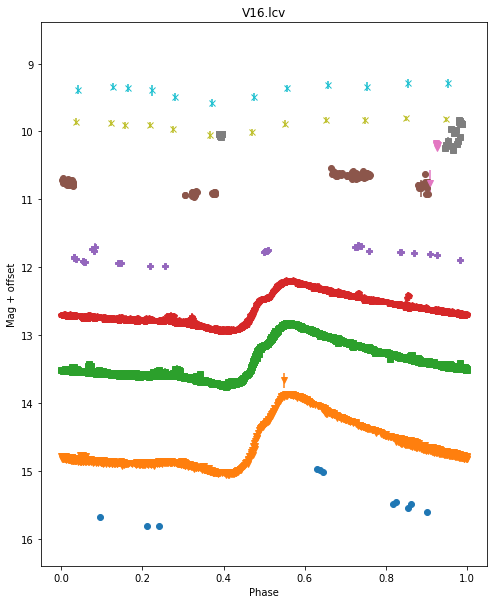

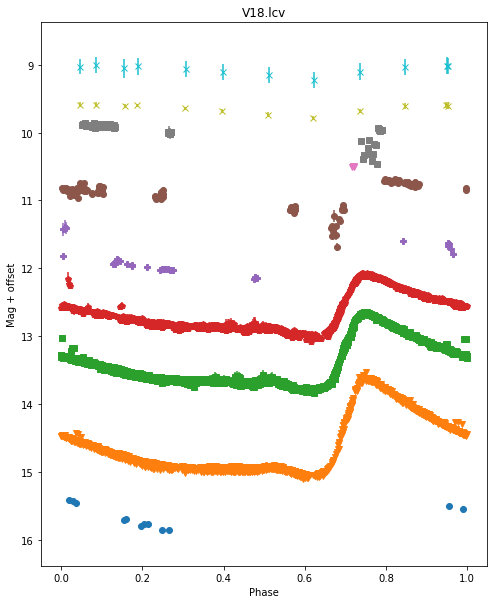

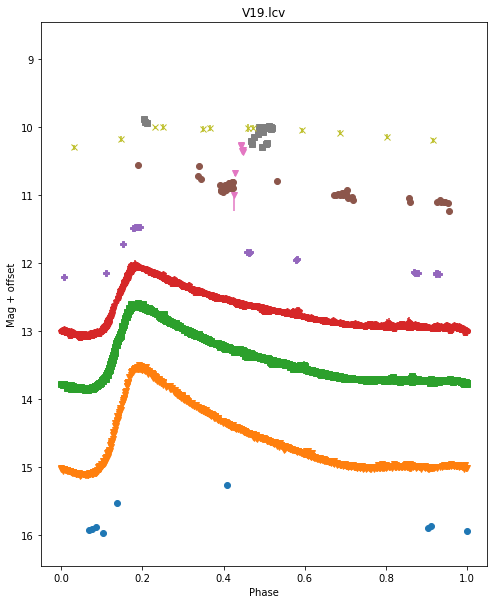

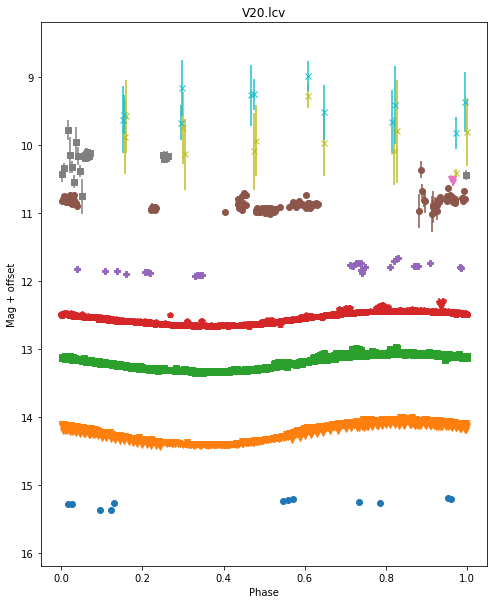

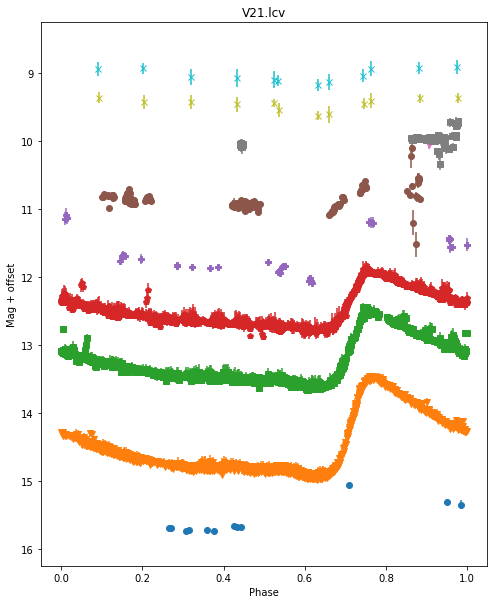

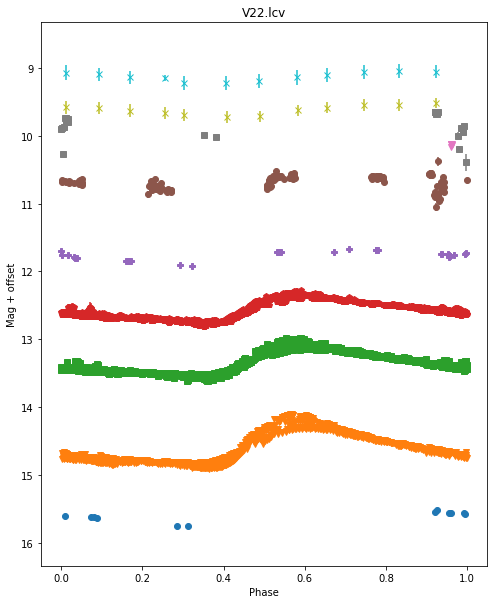

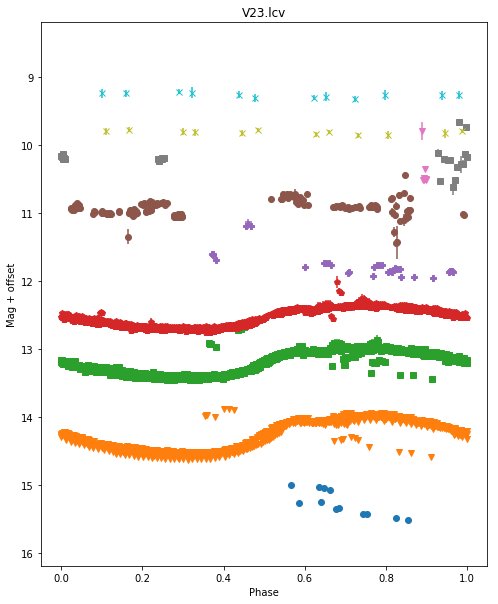

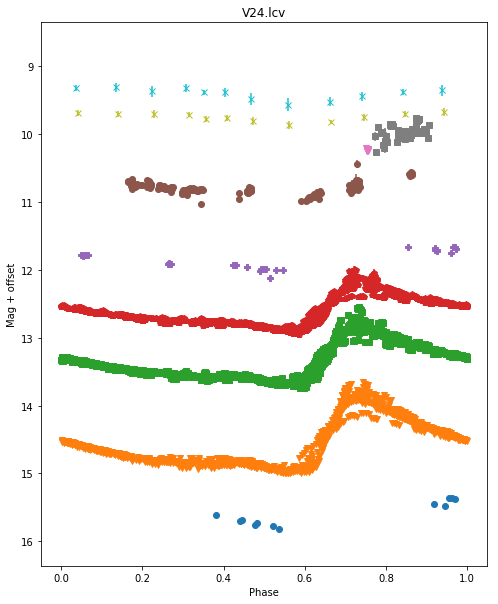

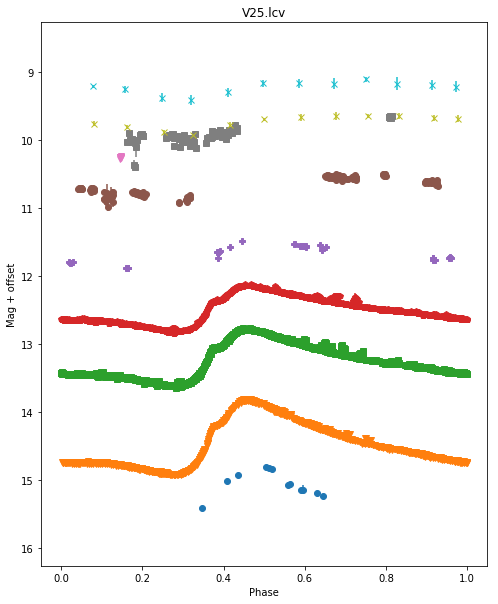

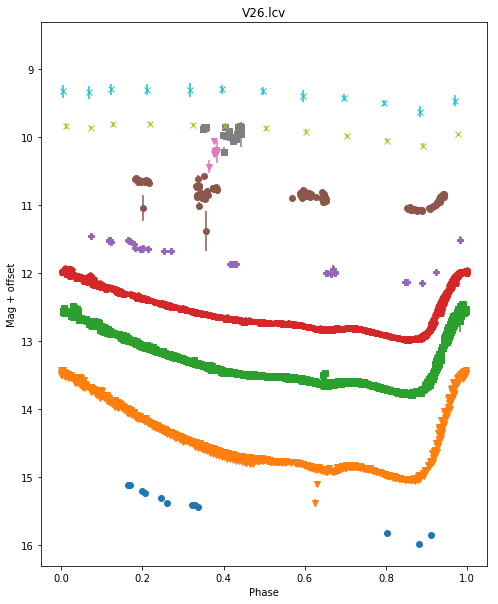

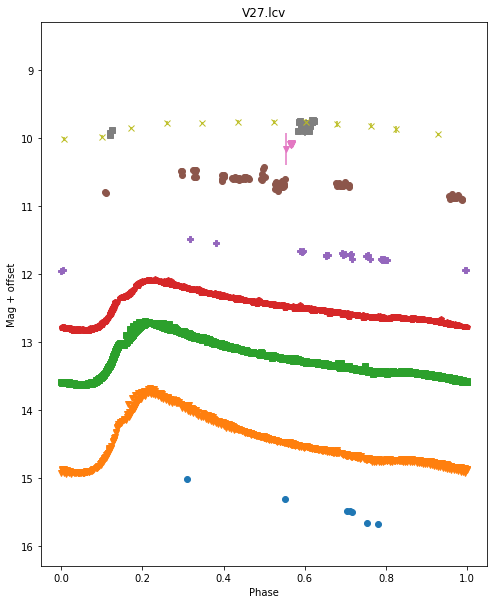

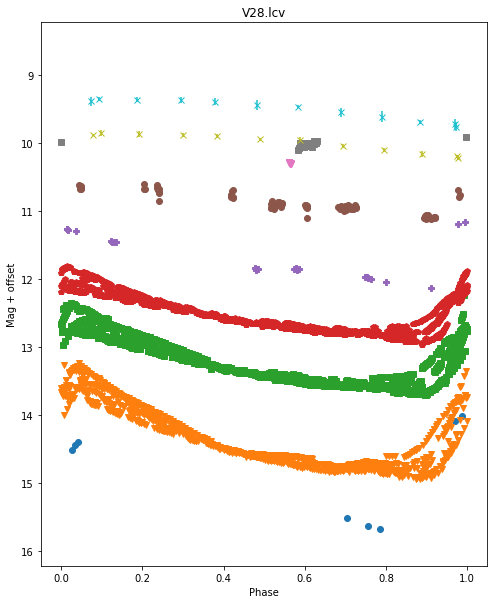

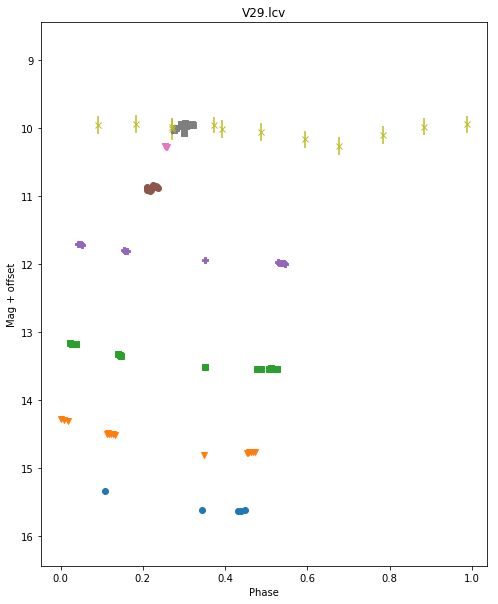

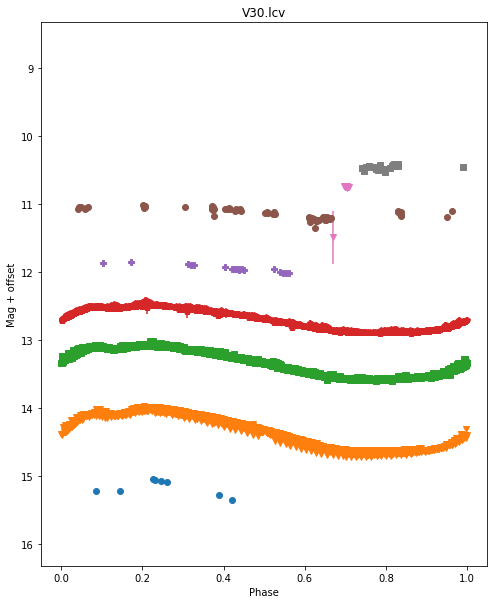

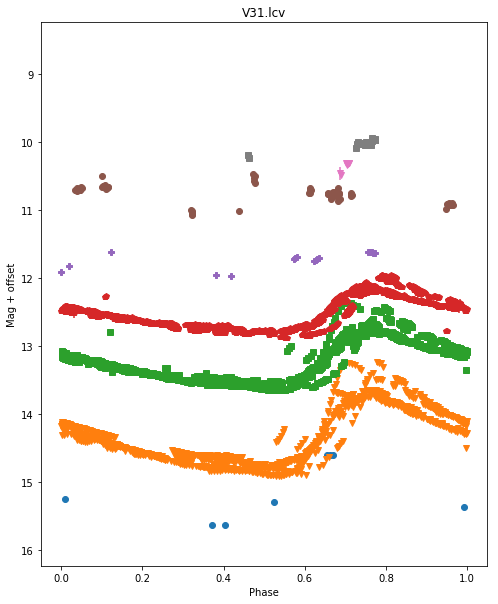

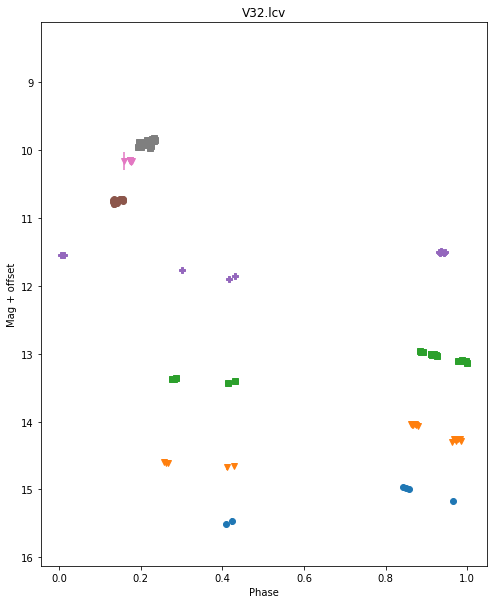

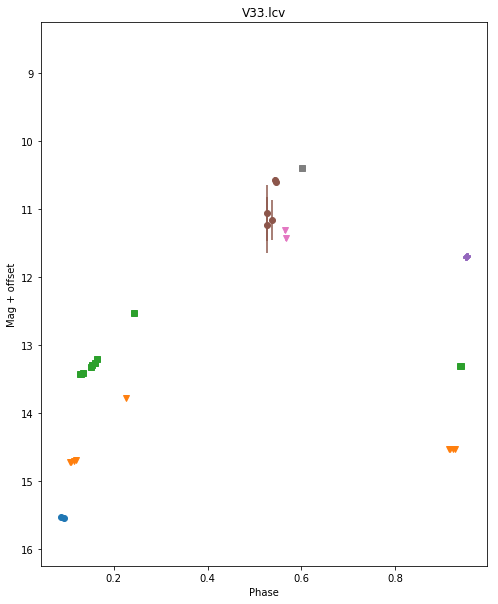

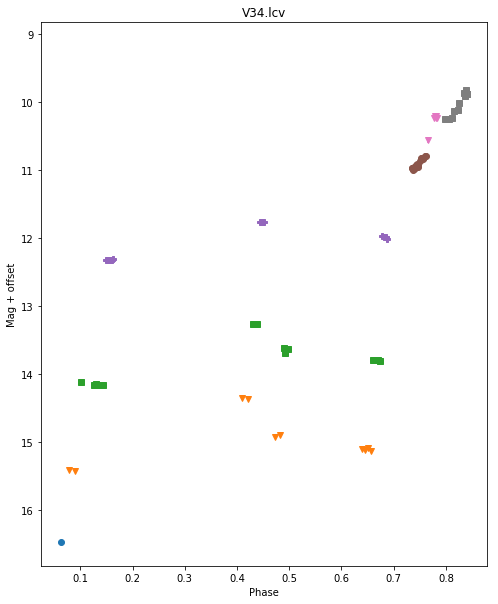

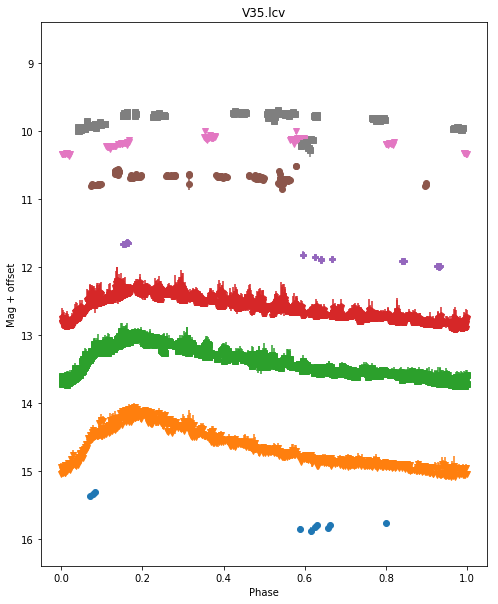

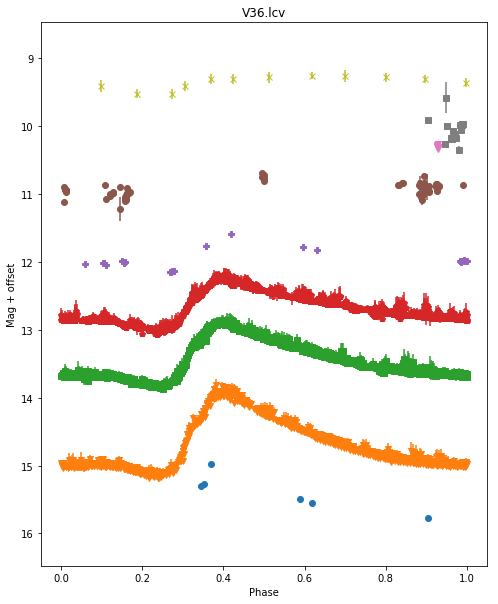

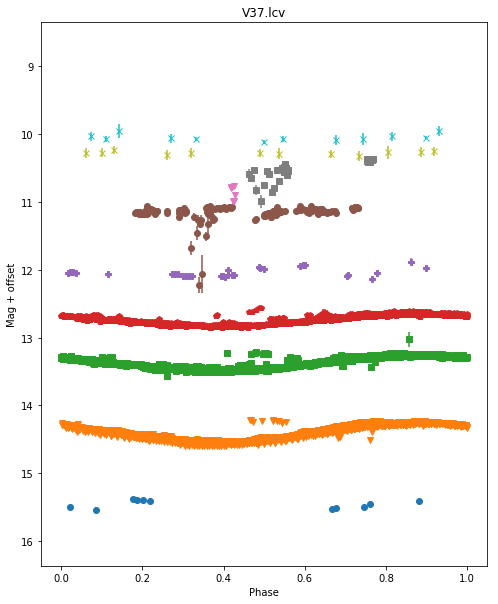

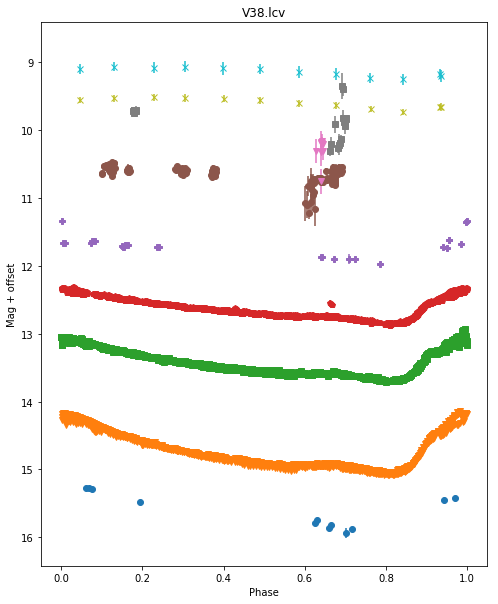

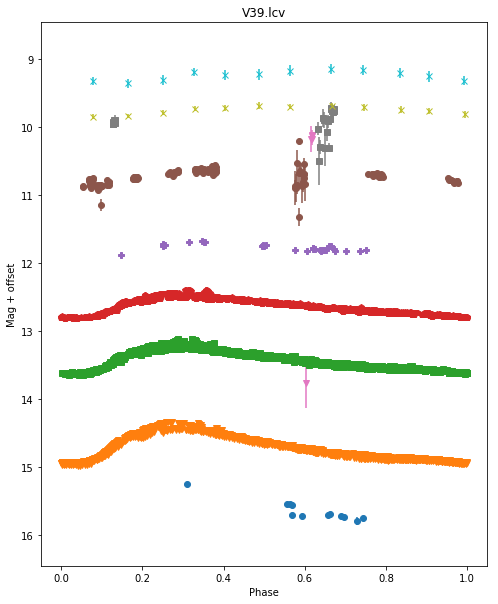

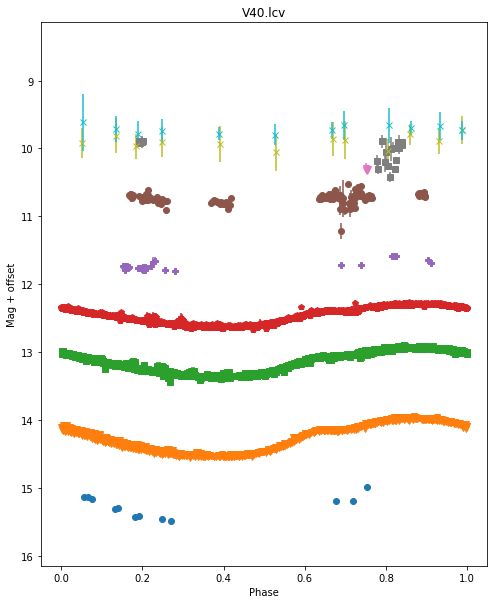

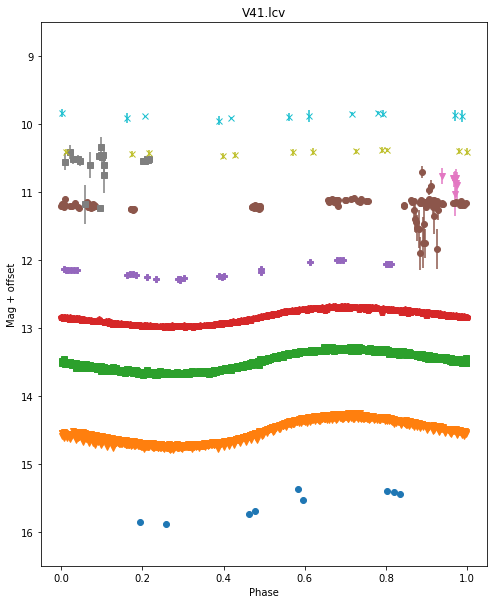

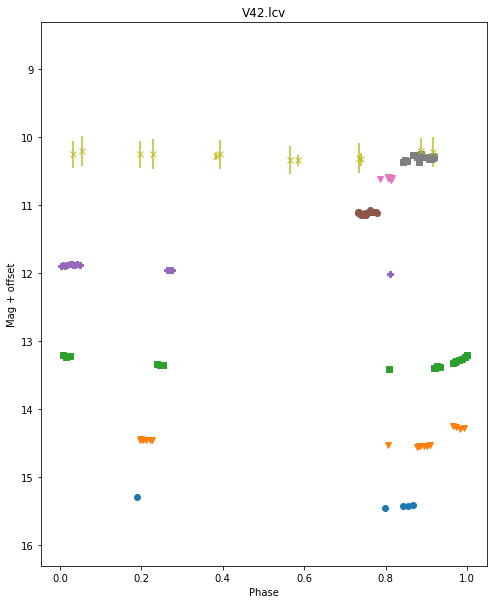

V43  not found.


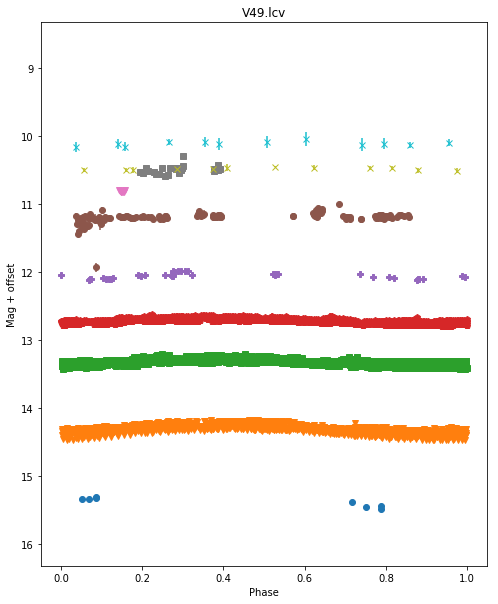

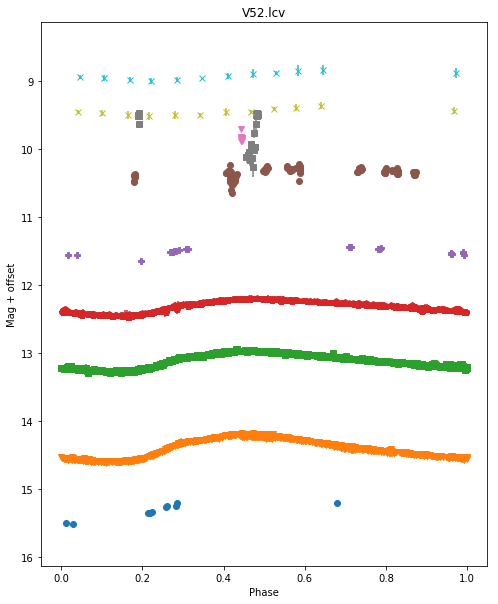

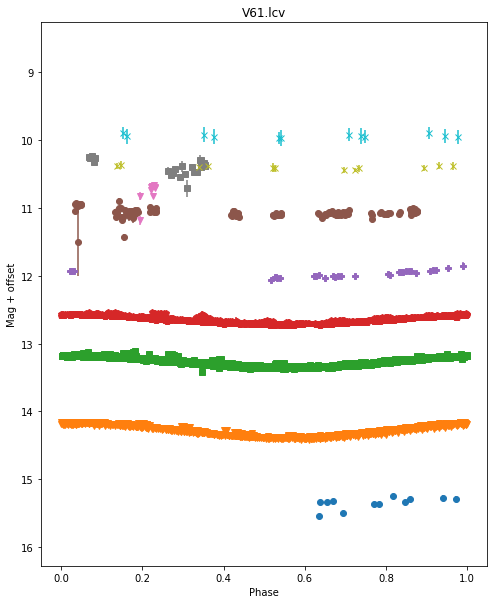

V64  not found.


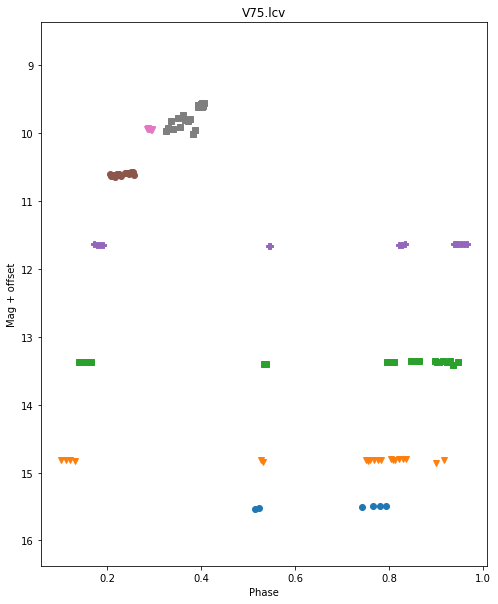

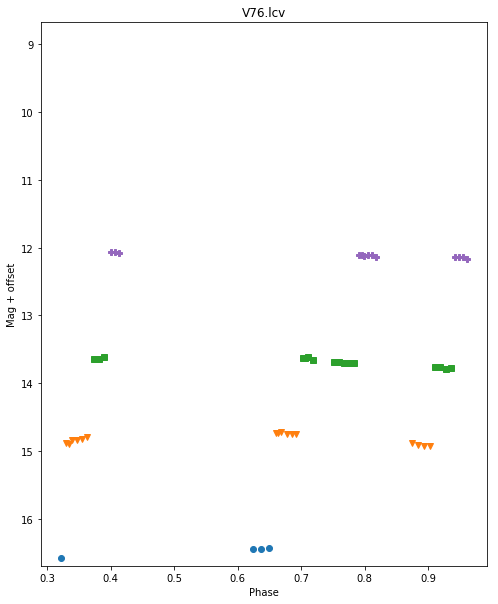

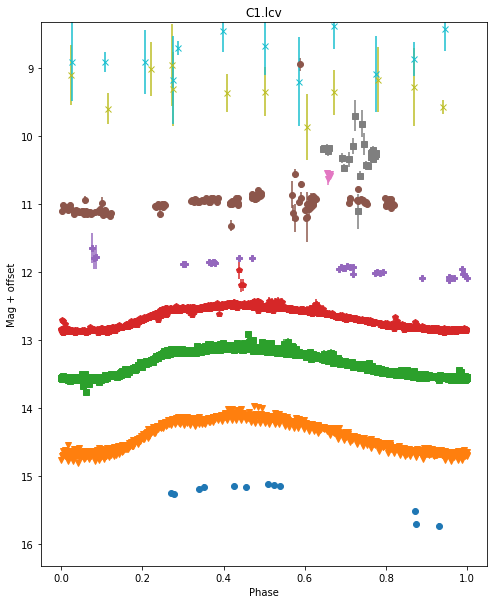

In [19]:
dtype1 = np.dtype([('id', 'S4'), ('cc_period', float), ('new_period', float)])
data = np.loadtxt(folder+target+'-variables.txt', dtype=dtype1, usecols=(0,1,2))
for ind, star in enumerate(data['id']):
    try:
        if np.isnan(data['new_period'][ind]):
            lightcurves.phase_lcv_all_bands(target, star+'.lcv',data['cc_period'][ind], 0, bin_mir=1, data_dir=folder)
        else:
            lightcurves.phase_lcv_all_bands(target, star+'.lcv',data['new_period'][ind], 0, bin_mir=1, data_dir=folder, old=1)
    except:
        print star, ' not found.'
        continue

## Fit light curves

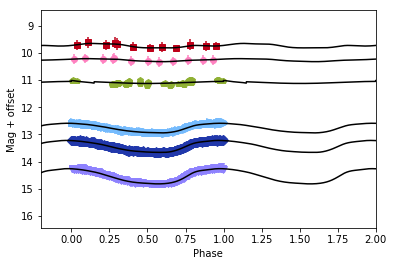

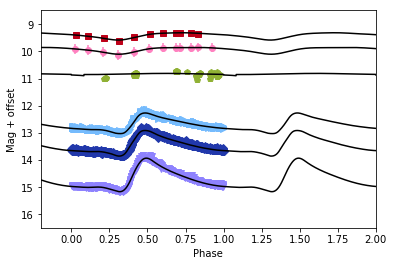

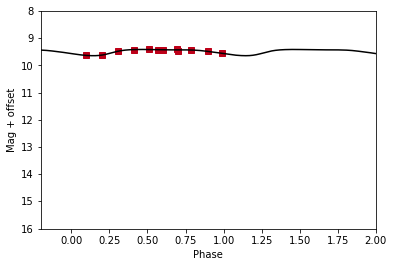

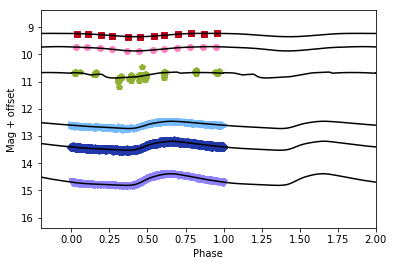

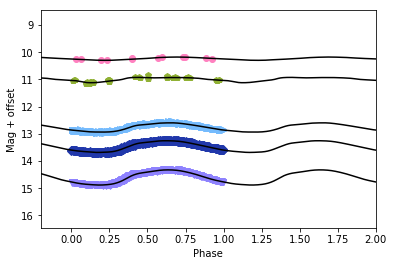

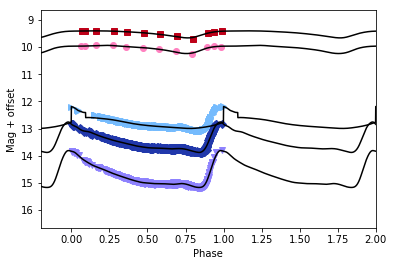

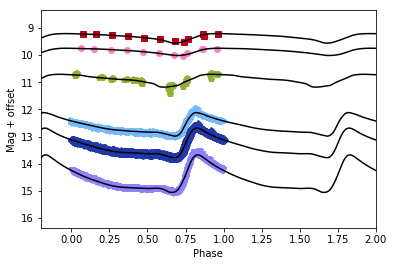

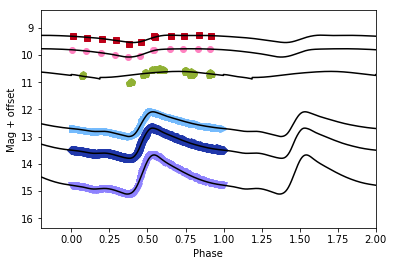

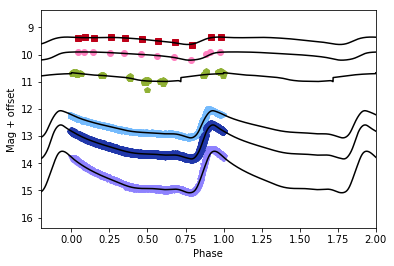

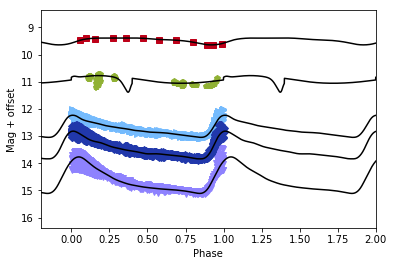

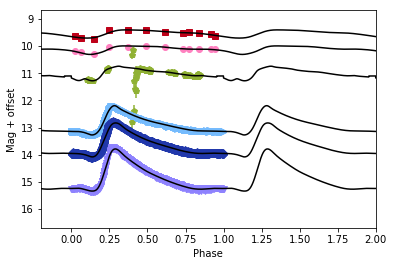

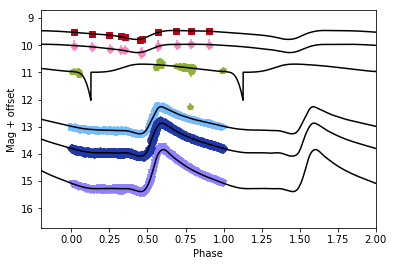

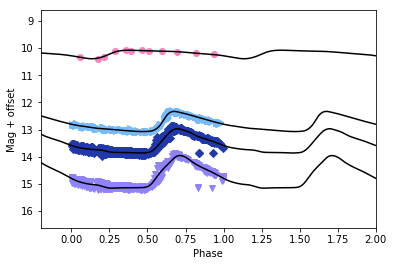

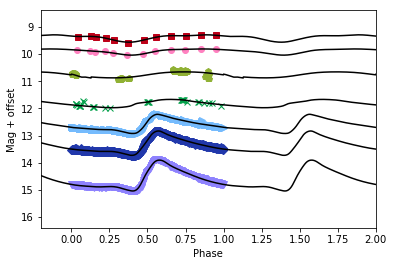

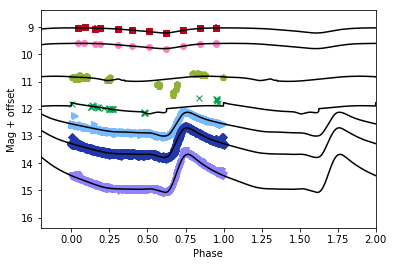

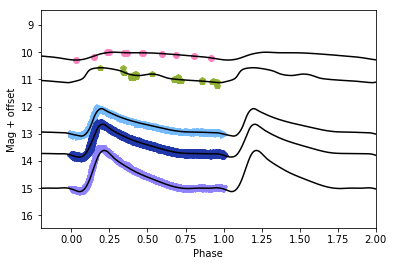

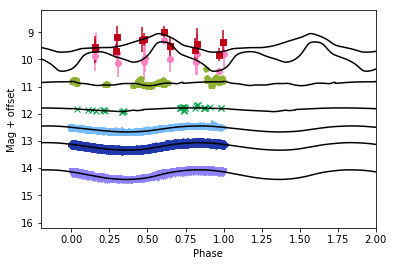

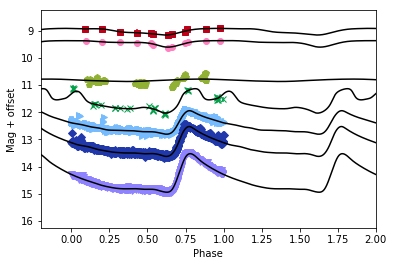

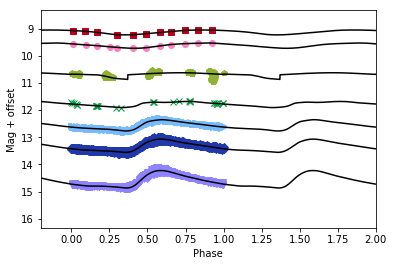

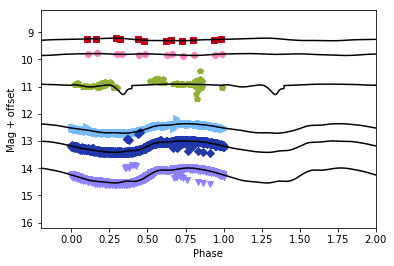

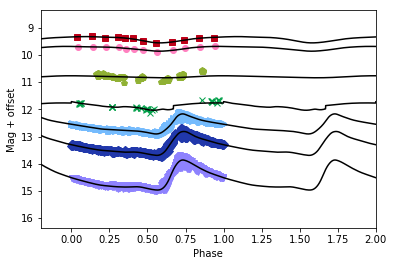

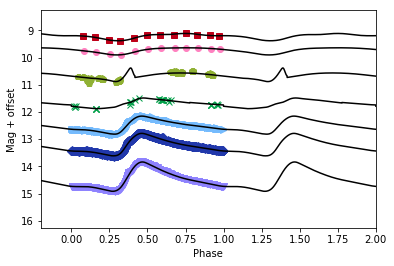

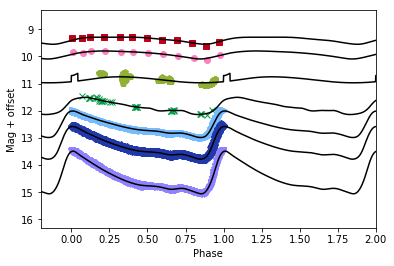

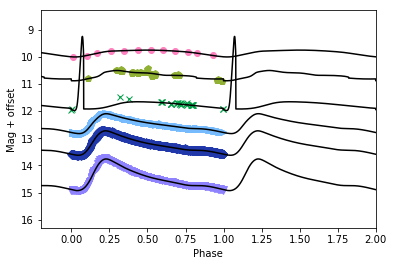

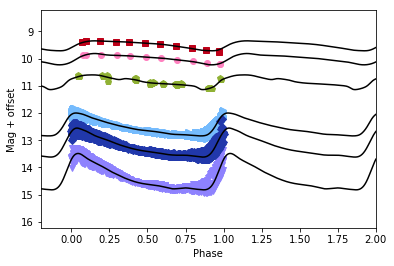

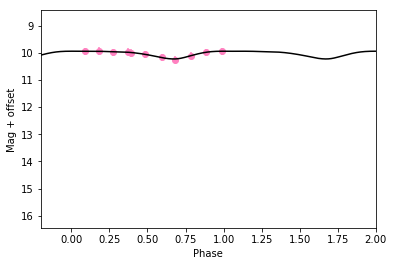

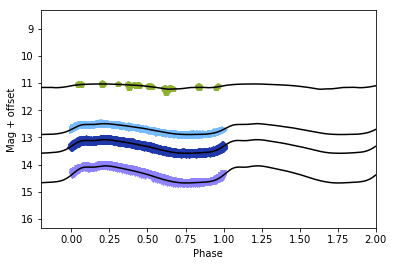

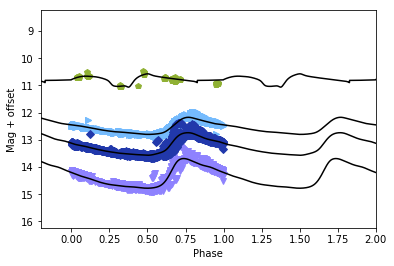

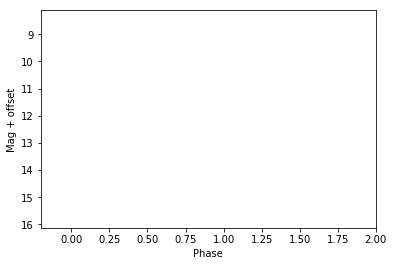

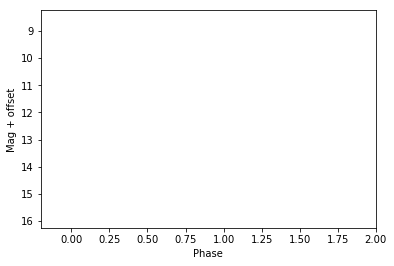

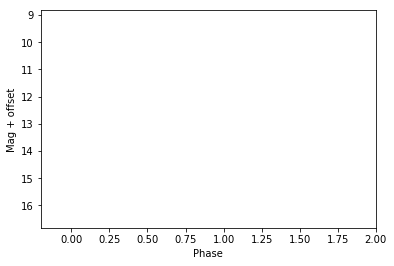

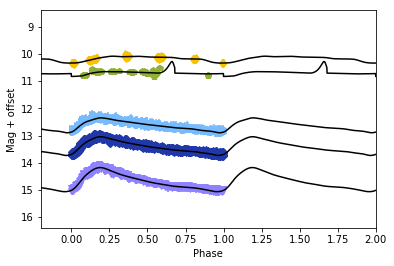

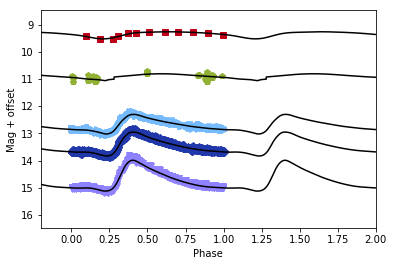

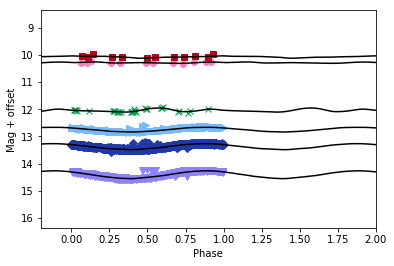

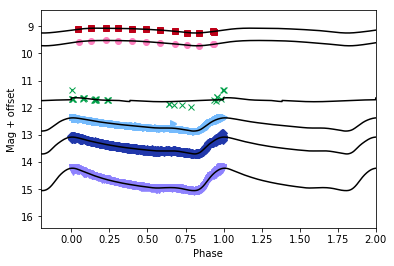

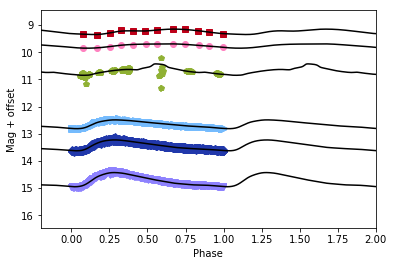

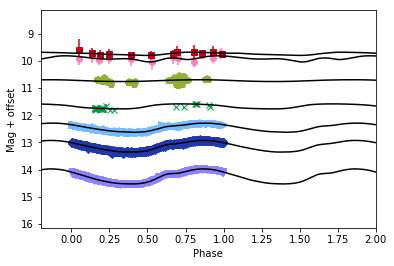

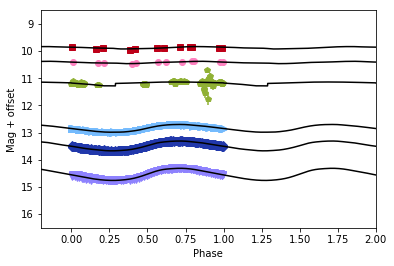

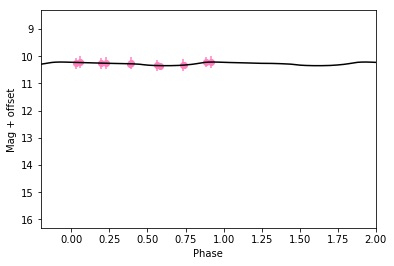

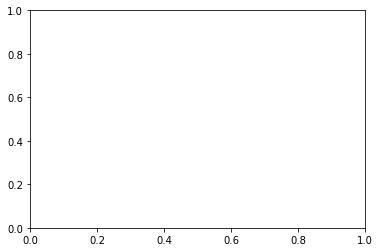

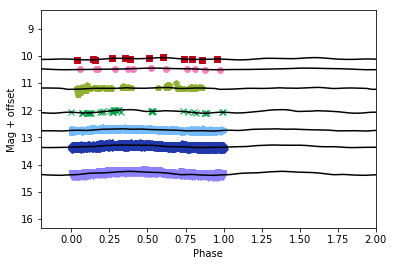

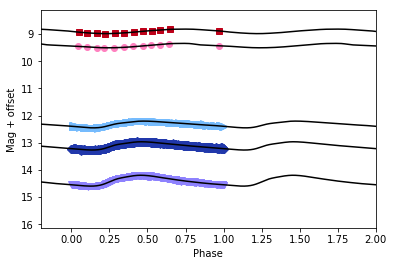

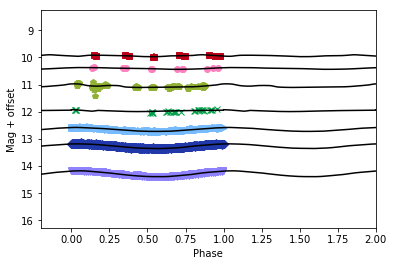

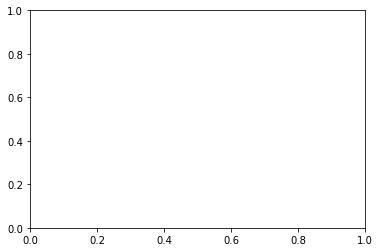

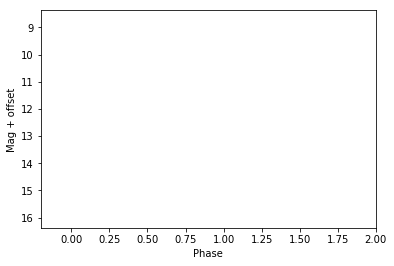

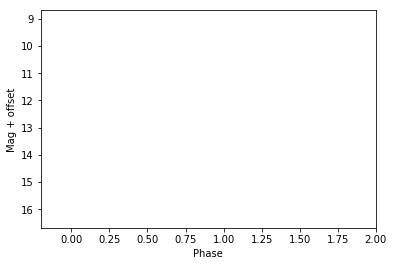

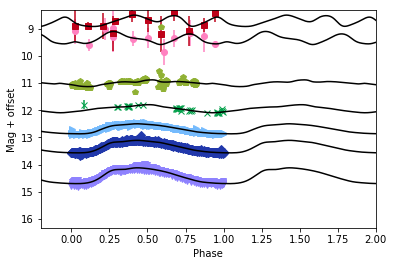

In [3]:
dtype1 = np.dtype([('id', 'S5'), ('cc_period', float), ('new_period', float)])
data = np.loadtxt(folder+target+'-variables.txt', dtype=dtype1, usecols=(0,1,2))
f = open(folder+'avg_mags.txt', 'w')

for ind, star in enumerate(data['id']):
    try:
        if data['new_period'][ind] == np.nan: 
            continue
        filters, avgmag, err, amp, sigma = lightcurves.gloess(folder+'lcvs/'+star+'.phased', ask=0, master_plot=1, clean=1)
        datasave = np.array(zip(np.repeat(star, len(filters)),filters, np.repeat(data['new_period'][ind], len(filters)), avgmag, err, amp, sigma), dtype=[('c1', 'S5'), ('c2', 'S2'), ('c3', float), ('c4', float), ('c5', float), ('c6', float), ('c7', float)])
        np.savetxt(f, datasave, fmt='%5s %2s %10.8f %6.3f %6.4f %4.2f %4.2f')
    except:
        continue
        print 'Star '+star+' failed.'
f.close()

/Users/Jill/anaconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in divide
/Users/Jill/anaconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in divide


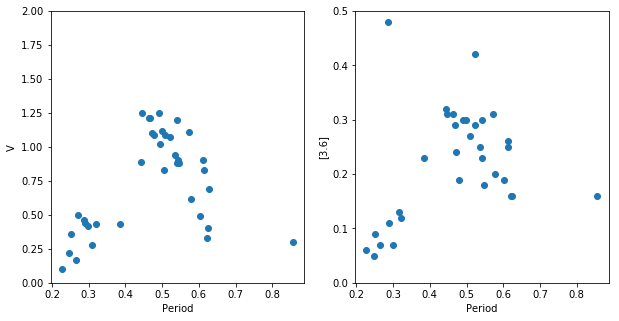

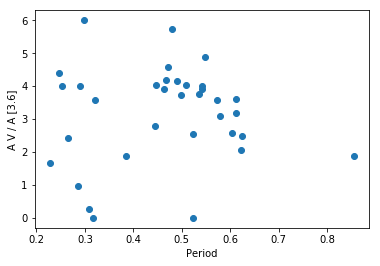

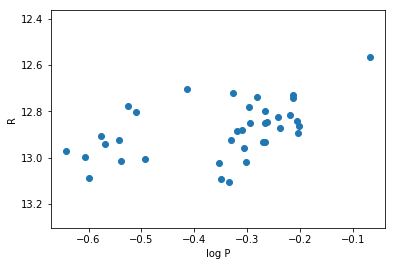

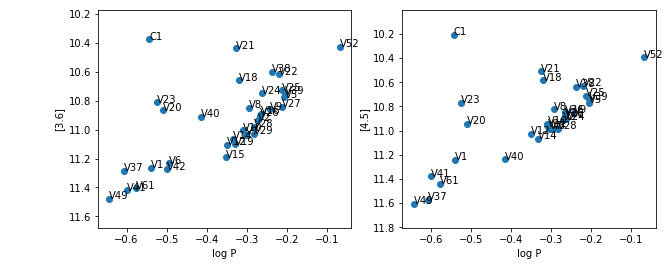

In [4]:
dtype = np.dtype([('star', 'S5'), ('filt', 'S2'), ('period', float), ('avg', float), ('amp', float)])
data = np.loadtxt(folder+'avg_mags.txt', dtype=dtype, usecols=(0,1,2,3,5))

perV = data['period'][data['filt'] == 'V']
perI1 = data['period'][data['filt'] == 'I1']
perI2 = data['period'][data['filt'] == 'I2']
Vamp = data['amp'][data['filt'] == 'V']
I1amp = data['amp'][data['filt'] == 'I1']
I2amp = data['amp'][data['filt'] == 'I2']
I1 = data['avg'][data['filt'] == 'I1']
I2 = data['avg'][data['filt'] == 'I2']
V = data['avg'][data['filt'] == 'V']

# Bailey diagram
fig = mp.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax.plot(perV[V > 0], Vamp[V > 0], 'o')
ax.set_ylim((0,2))
ax.set_xlabel('Period')
ax.set_ylabel('V')
ax2 = fig.add_subplot(122)
ax2.plot(perI1[I1 > 0], I1amp[I1 > 0], 'o')
ax2.set_ylim((0,0.5))
ax2.set_xlabel('Period')
ax2.set_ylabel('[3.6]')


# amplitude ratio 

R_amp = Vamp/I1amp
fig3 = mp.figure()
ax4 = fig3.add_subplot(111)
ax4.plot(perV, R_amp, 'o')
ax4.set_xlabel('Period')
ax4.set_ylabel('A V / A [3.6]')

# R band PL relation
fig5 = mp.figure()
ax5 = fig5.add_subplot(111)
Rper = data['period'][data['filt'] == 'R']
R = data['avg'][data['filt'] == 'R']
ax5.plot(np.log10(Rper[R > 0]), R[R > 0], 'o')
ax5.set_ylim((np.max(R[R > 0])+0.2,np.min(R[R>0])-0.2))
ax5.set_xlabel('log P')
ax5.set_ylabel('R')

# IRAC PL relation
fig2 = mp.figure(figsize=(10,4))
ax1 = fig2.add_subplot(121)
ax2 = fig2.add_subplot(122)
ax1.plot(np.log10(perI1[I1 > 0]), I1[I1 > 0], 'o')
ax1.set_ylim((np.max(I1[I1 > 0])+0.2,np.min(I1[I1 > 0])-0.2))
ax1.set_xlabel('log P')
ax1.set_ylabel('[3.6]')
ax2.plot(np.log10(perI2[I2 > 0]), I2[I2 > 0], 'o')
ax2.set_ylim((np.max(I2[I2 > 0])+0.2,np.min(I2[I2 > 0])-0.2))
ax2.set_xlabel('log P')
ax2.set_ylabel('[4.5]')

I1_labels = data['star'][data['filt'] == 'I1']
for label, x, y in zip(I1_labels, np.log10(perI1), I1):
    ax1.annotate(label, xy=(x, y))

I2_labels = data['star'][data['filt'] == 'I2']
for label, x, y in zip(I2_labels, np.log10(perI2), I2):
    ax2.annotate(label, xy=(x, y))

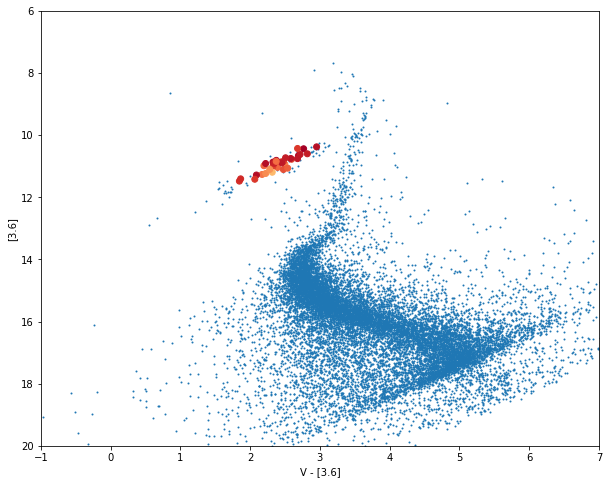

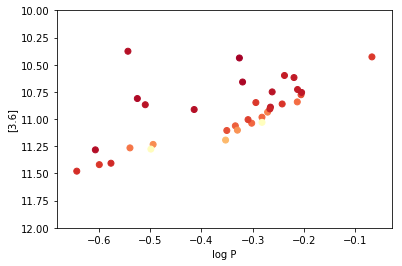

In [3]:
catalog_data = analysis_routines.read_merged_catalog(folder)

thres = 300
thres2 = 150
dist = catalog_data['rad_dist']
colorVIR = catalog_data['V'][dist > thres2] - catalog_data['3.6'][dist > thres2]
mag = catalog_data['V'][dist > thres2]
magIR = catalog_data['3.6'][dist > thres2]
err = catalog_data['3.6er'][dist > thres2]

good_mag = mag[err < 0.2]
good_color = colorVIR[err < 0.2]

fig2 = mp.figure(figsize=(10,8))
ax2 = fig2.add_subplot(111)
ax2.scatter(colorVIR, magIR, s=1, edgecolor=None)
ax2.set_ylim((20,6))
ax2.set_xlim((-1,7))
ax2.set_xlabel('V - [3.6]')
ax2.set_ylabel('[3.6]')

dtype = np.dtype([('star', 'S5'), ('filt', 'S2'), ('period', float), ('avg', float), ('err', float), ('amp', float)])
data = np.loadtxt(folder+'avg_mags.txt', dtype=dtype, usecols=(0,1,2,3,4,5))

dtype1 = np.dtype([('star', 'S10'), ('dao', int)])
dao_ids = np.loadtxt(folder+'PeterIDs.txt', dtype=dtype1, usecols=(0,1))

var_color = data['avg'][data['filt'] == 'V'] - data['avg'][data['filt'] == 'I1']
var_mag = data['avg'][data['filt'] == 'I1']
var_id = data['star'][data['filt'] == 'I1']
var_period = data['period'][data['filt'] == 'I1']
var_err = data['err'][data['filt'] == 'I1']

rdists = np.zeros(len(var_id))
for ind, star in enumerate(var_id):
    # find radial dist for this star
    dao_id = dao_ids['dao'][dao_ids['star'] == star]
    rdists[ind] = dist[catalog_data['id'] == dao_id[0]]

cm = mp.cm.get_cmap('RdYlBu')    
ax2.scatter(var_color, var_mag, c=rdists, cmap=cm) 
#ax2.plot(var_color, var_mag, 'o', color='r')

fig3 = mp.figure()
ax3 = fig3.add_subplot(111)
ax3.scatter(np.log10(var_period), var_mag, c=rdists, cmap=cm) 
#mp.colorbar()
#ax3.plot(np.log10(var_period), var_mag, 'o')
ax3.set_ylim((12,10))
ax3.set_xlabel('log P')
ax3.set_ylabel('[3.6]')

[33, 14, 24, 27, 29]
[ -1.99739646  10.308816  ]
[ -2.43987298  10.27934364]
0.0464759953568


/Users/Jill/anaconda2/envs/astroconda/lib/python2.7/site-packages/numpy/core/numeric.py:531: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


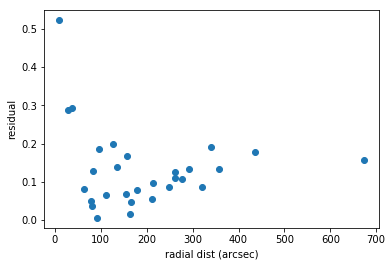

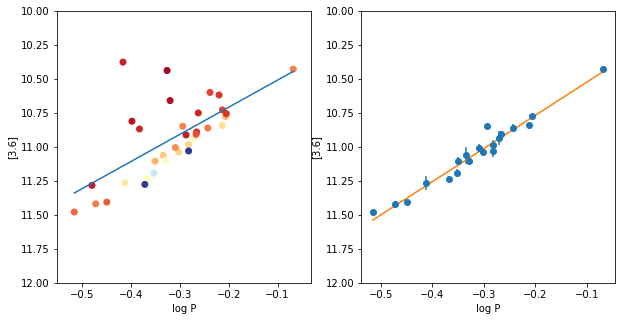

In [4]:
import numpy.ma as ma
var_mag = data['avg'][data['filt'] == 'I1']
var_id = data['star'][data['filt'] == 'I1']
var_period = data['period'][data['filt'] == 'I1']
var_err = data['err'][data['filt'] == 'I1']
var_mag = var_mag[~np.isnan(var_period)]
var_id = var_id[~np.isnan(var_period)]
var_err = var_err[~np.isnan(var_period)]
var_period = var_period[~np.isnan(var_period)]
rdists = np.zeros(len(var_id))
for ind, star in enumerate(var_id):
    # find radial dist for this star
    dao_id = dao_ids['dao'][dao_ids['star'] == star]
    rdists[ind] = dist[catalog_data['id'] == dao_id[0]]
    
var_id = var_id[var_mag > 0]
var_logP = np.log10(var_period[var_mag > 0])
rdists = rdists[var_mag > 0]
var_err = var_err[var_mag > 0]
var_mag = var_mag[var_mag > 0]
var_logP[var_logP < -0.4] += 0.127



# remove stars with bad light curves
bad_lcv = ['C1', 'V20', 'V37', 'V40', 'V42']

bad_index = [np.argwhere(var_id == x)[0][0] for x in bad_lcv]
print bad_index
masked_id = ma.array(var_id)
masked_id[bad_index] = ma.masked
masked_logP = ma.array(var_logP)
masked_logP[bad_index] = ma.masked
masked_mag = ma.array(var_mag)
masked_mag[bad_index] = ma.masked
masked_dists = ma.array(rdists)
masked_dists[bad_index] = ma.masked
masked_err = ma.array(var_err)
masked_err[bad_index] = ma.masked
# remove stars with questionable period?
# identify blended radius?
# remove stars near core of the cluster

fit = np.polyfit(masked_logP, masked_mag, 1)
print fit
residuals = np.abs(masked_mag - (fit[0]*masked_logP+fit[1]))
fig1 = mp.figure()
ax1 = fig1.add_subplot(111)
ax1.plot(masked_dists, residuals, 'o')
ax1.set_xlabel('radial dist (arcsec)')
ax1.set_ylabel('residual')

fig3 = mp.figure(figsize=(10,5))
ax3 = fig3.add_subplot(121)
ax3.scatter(var_logP, var_mag, c=rdists, cmap=cm) 
#mp.colorbar()
#ax3.plot(np.log10(var_period), var_mag, 'o')
x_line = np.array([np.min(var_logP), np.max(var_logP)])
y_line = fit[0]*x_line + fit[1]
ax3.plot(x_line, y_line)
ax3.set_ylim((12,10))
ax3.set_xlabel('log P')
ax3.set_ylabel('[3.6]')
thresh = 100.
good_logP = masked_logP[masked_dists > thresh]
good_mag = masked_mag[masked_dists > thresh]
good_err = masked_err[masked_dists > thresh]
ax4 = fig3.add_subplot(122)
#ax4.scatter(masked_logP[masked_dists > thresh], masked_mag[masked_dists > thresh], c=masked_dists[masked_dists > thresh], cmap=cm) 
ax4.errorbar(good_logP, good_mag, yerr = good_err, fmt='o')
ax4.set_ylim((12,10))
ax4.set_xlabel('log P')
ax4.set_ylabel('[3.6]')

fit2 = np.polyfit(good_logP, good_mag, 1)
yline2 = fit2[0]*x_line+fit2[1]
ax4.plot(x_line, yline2)
residuals2 = good_mag - (fit2[0]*good_logP + fit2[1])
print fit2
print np.std(residuals2)

[30, 13, 25, 22]
[ -2.09488729  10.26494686]
[ -2.60987301  10.16716935]
0.0628350293019


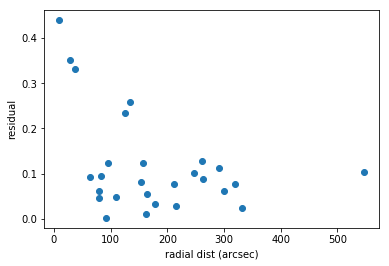

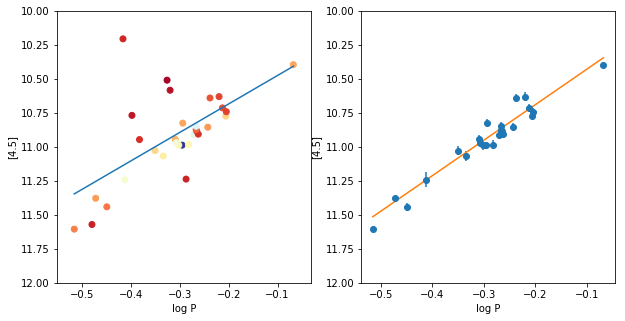

In [13]:
var_mag = data['avg'][data['filt'] == 'I2']
var_id = data['star'][data['filt'] == 'I2']
var_period = data['period'][data['filt'] == 'I2']
var_err = data['err'][data['filt'] == 'I2']
var_mag = var_mag[~np.isnan(var_period)]
var_id = var_id[~np.isnan(var_period)]
var_err = var_err[~np.isnan(var_period)]
var_period = var_period[~np.isnan(var_period)]
rdists = np.zeros(len(var_id))
for ind, star in enumerate(var_id):
    # find radial dist for this star
    dao_id = dao_ids['dao'][dao_ids['star'] == star]
    rdists[ind] = dist[catalog_data['id'] == dao_id[0]]
    
var_id = var_id[var_mag > 0]
var_logP = np.log10(var_period[var_mag > 0])
rdists = rdists[var_mag > 0]
var_err = var_err[var_mag > 0]
var_mag = var_mag[var_mag > 0]
var_logP[var_logP < -0.4] += 0.127



# remove stars with bad light curves
bad_lcv = ['C1', 'V20', 'V40', 'V37']

bad_index = [np.argwhere(var_id == x)[0][0] for x in bad_lcv]
print bad_index
masked_id = ma.array(var_id)
masked_id[bad_index] = ma.masked
masked_logP = ma.array(var_logP)
masked_logP[bad_index] = ma.masked
masked_mag = ma.array(var_mag)
masked_mag[bad_index] = ma.masked
masked_dists = ma.array(rdists)
masked_dists[bad_index] = ma.masked
masked_err = ma.array(var_err)
masked_err[bad_index] = ma.masked
# remove stars with questionable period?
# identify blended radius?
# remove stars near core of the cluster

fit = np.polyfit(masked_logP, masked_mag, 1)
print fit
residuals = np.abs(masked_mag - (fit[0]*masked_logP+fit[1]))
fig1 = mp.figure()
ax1 = fig1.add_subplot(111)
ax1.plot(masked_dists, residuals, 'o')
ax1.set_xlabel('radial dist (arcsec)')
ax1.set_ylabel('residual')

fig3 = mp.figure(figsize=(10,5))
ax3 = fig3.add_subplot(121)
ax3.scatter(var_logP, var_mag, c=rdists, cmap=cm) 
#mp.colorbar()
#ax3.plot(np.log10(var_period), var_mag, 'o')
x_line = np.array([np.min(var_logP), np.max(var_logP)])
y_line = fit[0]*x_line + fit[1]
ax3.plot(x_line, y_line)
ax3.set_ylim((12,10))
ax3.set_xlabel('log P')
ax3.set_ylabel('[4.5]')
thresh = 60.
good_logP = masked_logP[masked_dists > thresh]
good_mag = masked_mag[masked_dists > thresh]
good_err = masked_err[masked_dists > thresh]
ax4 = fig3.add_subplot(122)
#ax4.scatter(masked_logP[masked_dists > thresh], masked_mag[masked_dists > thresh], c=masked_dists[masked_dists > thresh], cmap=cm) 
ax4.errorbar(good_logP, good_mag, yerr=good_err, fmt='o')
ax4.set_ylim((12,10))
ax4.set_xlabel('log P')
ax4.set_ylabel('[4.5]')

fit2 = np.polyfit(good_logP, good_mag, 1)
yline2 = fit2[0]*x_line+fit2[1]
ax4.plot(x_line, yline2)
residuals2 = good_mag - (fit2[0]*good_logP + fit2[1])
print fit2
print np.std(residuals2)